### Context

The stock market has consistently proven to be a good place to invest in and save for the future. There are a lot of compelling reasons to invest in stocks. It can help in fighting inflation, create wealth, and also provides some tax benefits. Good steady returns on investments over a long period of time can also grow a lot more than seems possible. Also, thanks to the power of compound interest, the earlier one starts investing, the larger the corpus one can have for retirement. Overall, investing in stocks can help meet life's financial aspirations.

It is important to maintain a diversified portfolio when investing in stocks in order to maximise earnings under any market condition. Having a diversified portfolio tends to yield higher returns and face lower risk by tempering potential losses when the market is down. It is often easy to get lost in a sea of financial metrics to analyze while determining the worth of a stock, and doing the same for a multitude of stocks to identify the right picks for an individual can be a tedious task. By doing a cluster analysis, one can identify stocks that exhibit similar characteristics and ones which exhibit minimum correlation. This will help investors better analyze stocks across different market segments and help protect against risks that could make the portfolio vulnerable to losses.


### Objective

Trade&Ahead is a financial consultancy firm who provide their customers with personalized investment strategies. They have hired you as a Data Scientist and provided you with data comprising stock price and some financial indicators for a few companies listed under the New York Stock Exchange. They have assigned you the tasks of analyzing the data, grouping the stocks based on the attributes provided, and sharing insights about the characteristics of each group.

### Data Dictionary

- Ticker Symbol: An abbreviation used to uniquely identify publicly traded shares of a particular stock on a particular stock market
- Company: Name of the company
- GICS Sector: The specific economic sector assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- GICS Sub Industry: The specific sub-industry group assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- Current Price: Current stock price in dollars
- Price Change: Percentage change in the stock price in 13 weeks
- Volatility: Standard deviation of the stock price over the past 13 weeks
- ROE: A measure of financial performance calculated by dividing net income by shareholders' equity (shareholders' equity is equal to a company's assets minus its debt)
- Cash Ratio: The ratio of a  company's total reserves of cash and cash equivalents to its total current liabilities
- Net Cash Flow: The difference between a company's cash inflows and outflows (in dollars)
- Net Income: Revenues minus expenses, interest, and taxes (in dollars)
- Earnings Per Share: Company's net profit divided by the number of common shares it has outstanding (in dollars)
- Estimated Shares Outstanding: Company's stock currently held by all its shareholders
- P/E Ratio: Ratio of the company's current stock price to the earnings per share
- P/B Ratio: Ratio of the company's stock price per share by its book value per share (book value of a company is the net difference between that company's total assets and total liabilities)

## Importing necessary libraries and data

In [151]:
# data reading libraries
import numpy as np
import pandas as pd

#data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

#pipeline and preprocessing libraries
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# to compute distances
from scipy.spatial.distance import cdist

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# to compute distances
from scipy.spatial.distance import pdist

# to perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet


In [152]:
# mount the Google Colab Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [153]:
import warnings
warnings.filterwarnings('ignore')

In [154]:
df_original = pd.read_csv('/content/drive/MyDrive/PGP-DS_UT/7-Unsupervised_Learning/Project/stock_data.csv')
# returns the first 5 rows
df = df_original.copy()
df.head()

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
0,AAL,American Airlines Group,Industrials,Airlines,42.349998,9.999995,1.687151,135,51,-604000000,7610000000,11.39,6.681299e+08,3.718174,-8.784219
1,ABBV,AbbVie,Health Care,Pharmaceuticals,59.240002,8.339433,2.197887,130,77,51000000,5144000000,3.15,1.633016e+09,18.806350,-8.750068
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,44.910000,11.301121,1.273646,21,67,938000000,4423000000,2.94,1.504422e+09,15.275510,-0.394171
3,ADBE,Adobe Systems Inc,Information Technology,Application Software,93.940002,13.977195,1.357679,9,180,-240840000,629551000,1.26,4.996437e+08,74.555557,4.199651
4,ADI,"Analog Devices, Inc.",Information Technology,Semiconductors,55.320000,-1.827858,1.701169,14,272,315120000,696878000,0.31,2.247994e+09,178.451613,1.059810


## Data Overview

In [155]:
df.shape

(340, 15)

In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticker Symbol                 340 non-null    object 
 1   Security                      340 non-null    object 
 2   GICS Sector                   340 non-null    object 
 3   GICS Sub Industry             340 non-null    object 
 4   Current Price                 340 non-null    float64
 5   Price Change                  340 non-null    float64
 6   Volatility                    340 non-null    float64
 7   ROE                           340 non-null    int64  
 8   Cash Ratio                    340 non-null    int64  
 9   Net Cash Flow                 340 non-null    int64  
 10  Net Income                    340 non-null    int64  
 11  Earnings Per Share            340 non-null    float64
 12  Estimated Shares Outstanding  340 non-null    float64
 13  P/E R

In [157]:
df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Ticker Symbol,340,340,AAL,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Security,340,340,American Airlines Group,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GICS Sector,340,11,Industrials,53,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GICS Sub Industry,340,104,Oil & Gas Exploration & Production,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Current Price,340.0,NaN,NaN,NaN,80.862345,98.055086,4.5,38.555,59.705,92.880001,1274.949951
Price Change,340.0,NaN,NaN,NaN,4.078194,12.006338,-47.129693,-0.939484,4.819505,10.695493,55.051683
Volatility,340.0,NaN,NaN,NaN,1.525976,0.591798,0.733163,1.134878,1.385593,1.695549,4.580042
ROE,340.0,NaN,NaN,NaN,39.597059,96.547538,1.0,9.75,15.0,27.0,917.0
Cash Ratio,340.0,NaN,NaN,NaN,70.023529,90.421331,0.0,18.0,47.0,99.0,958.0
Net Cash Flow,340.0,NaN,NaN,NaN,55537620.588235,1946365312.175789,-11208000000.0,-193906500.0,2098000.0,169810750.0,20764000000.0


In [158]:
df.nunique()

Ticker Symbol                   340
Security                        340
GICS Sector                      11
GICS Sub Industry               104
Current Price                   336
Price Change                    340
Volatility                      340
ROE                              82
Cash Ratio                      124
Net Cash Flow                   332
Net Income                      335
Earnings Per Share              268
Estimated Shares Outstanding    323
P/E Ratio                       295
P/B Ratio                       299
dtype: int64

Observations:


*   It's great that we have no missing values, which makes sense given that it's public information and it'll simplify our clustering process
*   We have a list of 340 unique stocks and the vast majority have a difference in current price.
*   Ticker and Security are two ways to identify the same company, so these will both be removed



## Exploratory Data Analysis (EDA)

**Questions**:

1. What does the distribution of stock prices look like?
2. The stocks of which economic sector have seen the maximum price increase on average?
3. How are the different variables correlated with each other?
4. Cash ratio provides a measure of a company's ability to cover its short-term obligations using only cash and cash equivalents. How does the average cash ratio vary across economic sectors?
5. P/E ratios can help determine the relative value of a company's shares as they signify the amount of money an investor is willing to invest in a single share of a company per dollar of its earnings. How does the P/E ratio vary, on average, across economic sectors?

In [159]:
# function to plot a boxplot and a histogram along the same scale.
def histogram_boxplot(data, feature, figsize=(20, 7), kde=False, bins=None):
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter", hue = "Target"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [160]:
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top, sorted in descending order by count, with x-axis labels centered under each column.

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].value_counts().count()
    if n is None:
        plt.figure(figsize=(count + 2, 5))
    else:
        plt.figure(figsize=(n + 2, 5))

    plt.title(f"Barplot of {feature}")
    order = data[feature].value_counts().index[:n] if n is not None else data[feature].value_counts().index

    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=order,
    )

    # Rotate labels to 45 degrees and align them to the center
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="center")

    for p in ax.patches:
        height = p.get_height()
        label = "{:.1f}%".format(100 * height / total) if perc else height
        ax.annotate(label, (p.get_x() + p.get_width() / 2., height), ha="center", va="bottom", xytext=(0, 5), textcoords="offset points", size=12)

    plt.tight_layout()  # Adjust layout to make sure everything fits without overlapping
    plt.show()

I'll proceed to loop through each feature, to get a better sense of the data

### Univariate Analysis

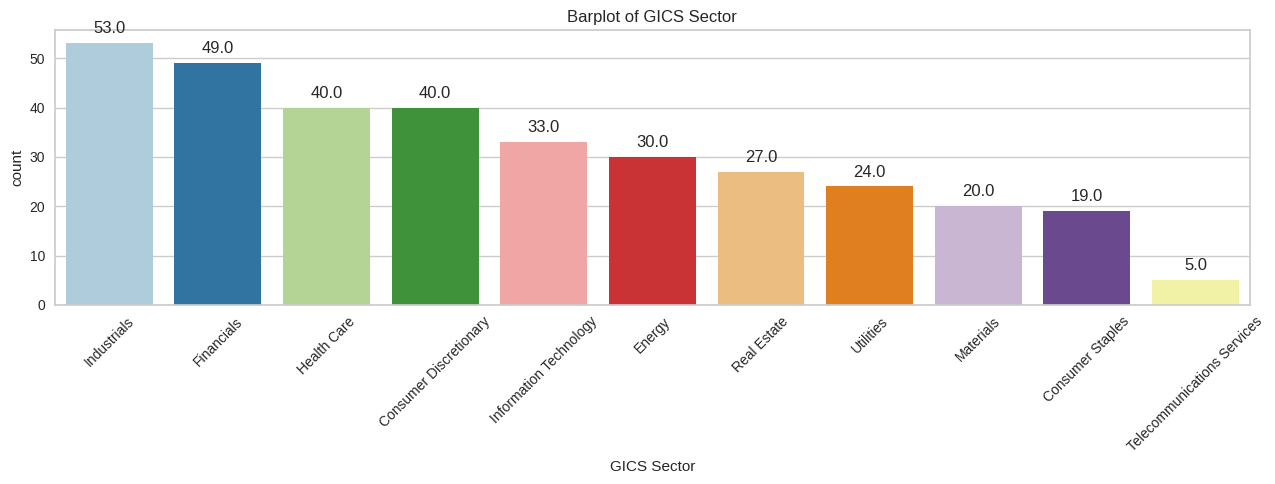

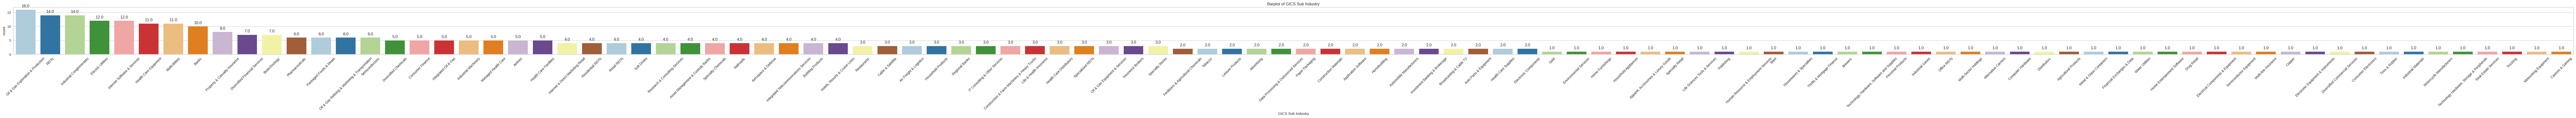

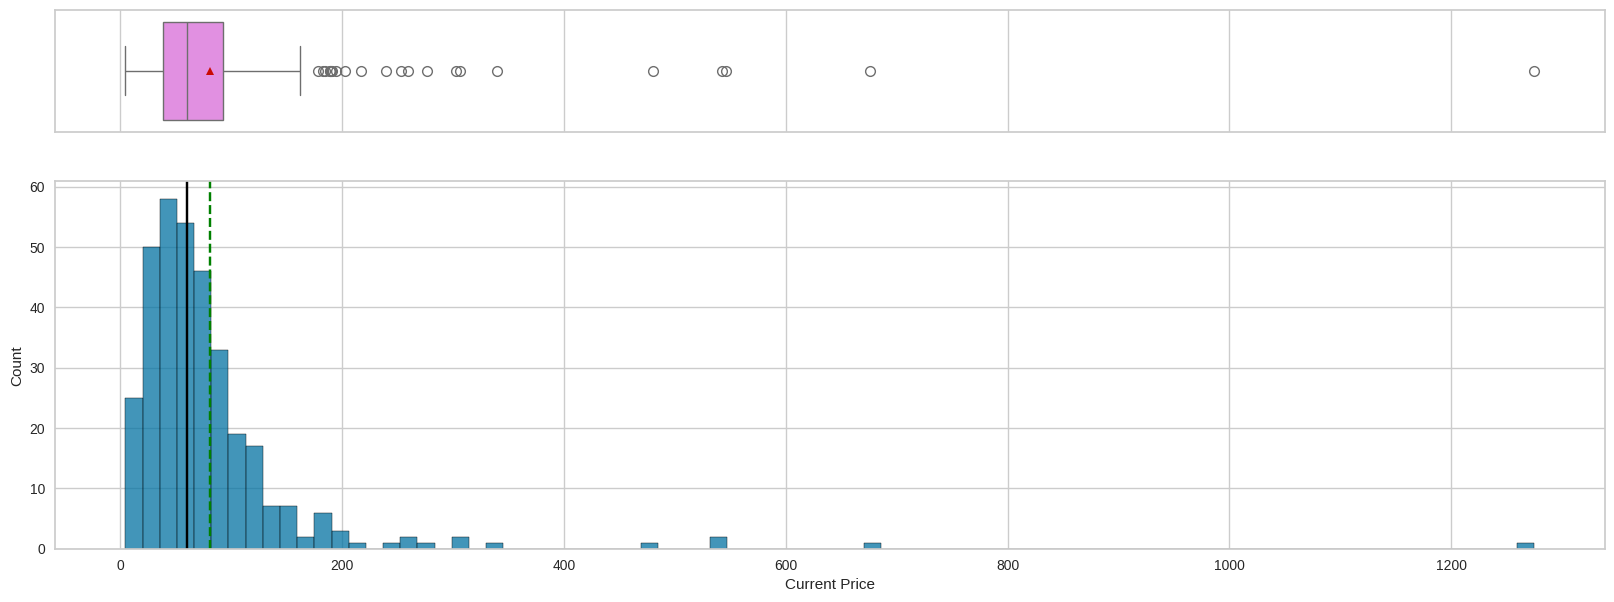

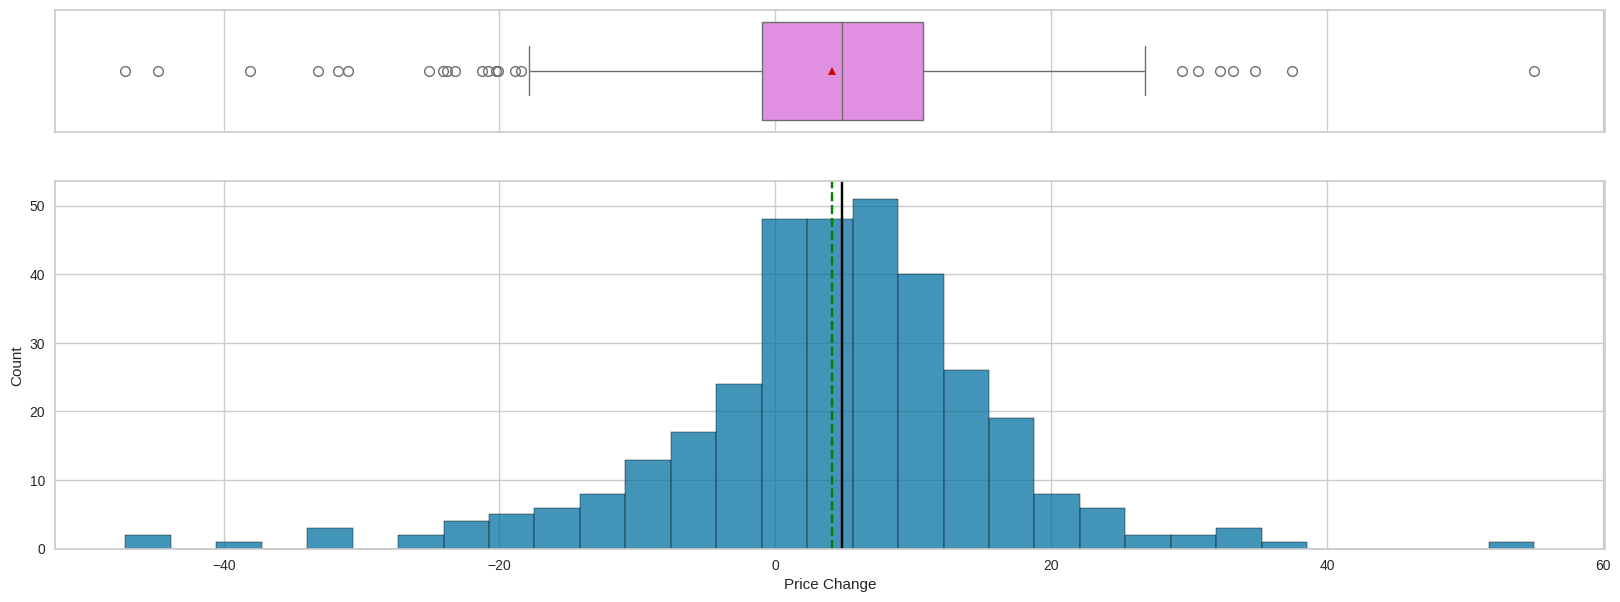

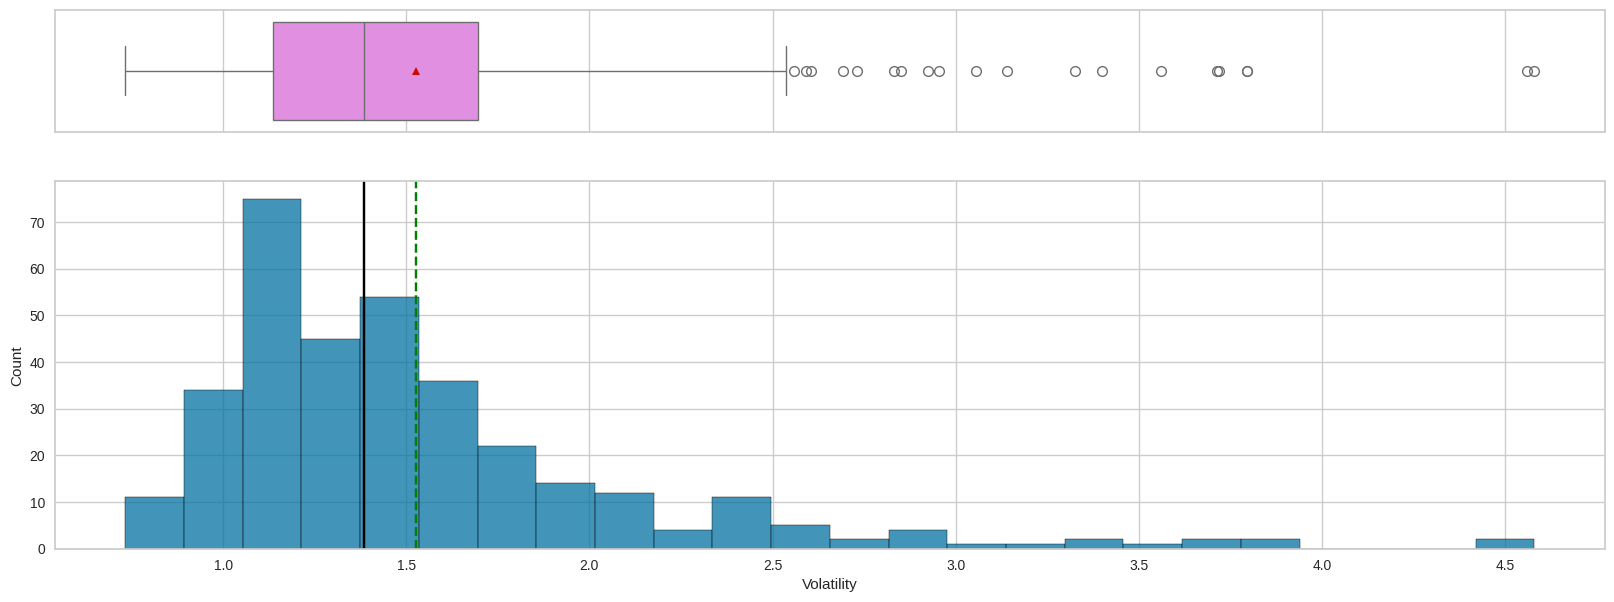

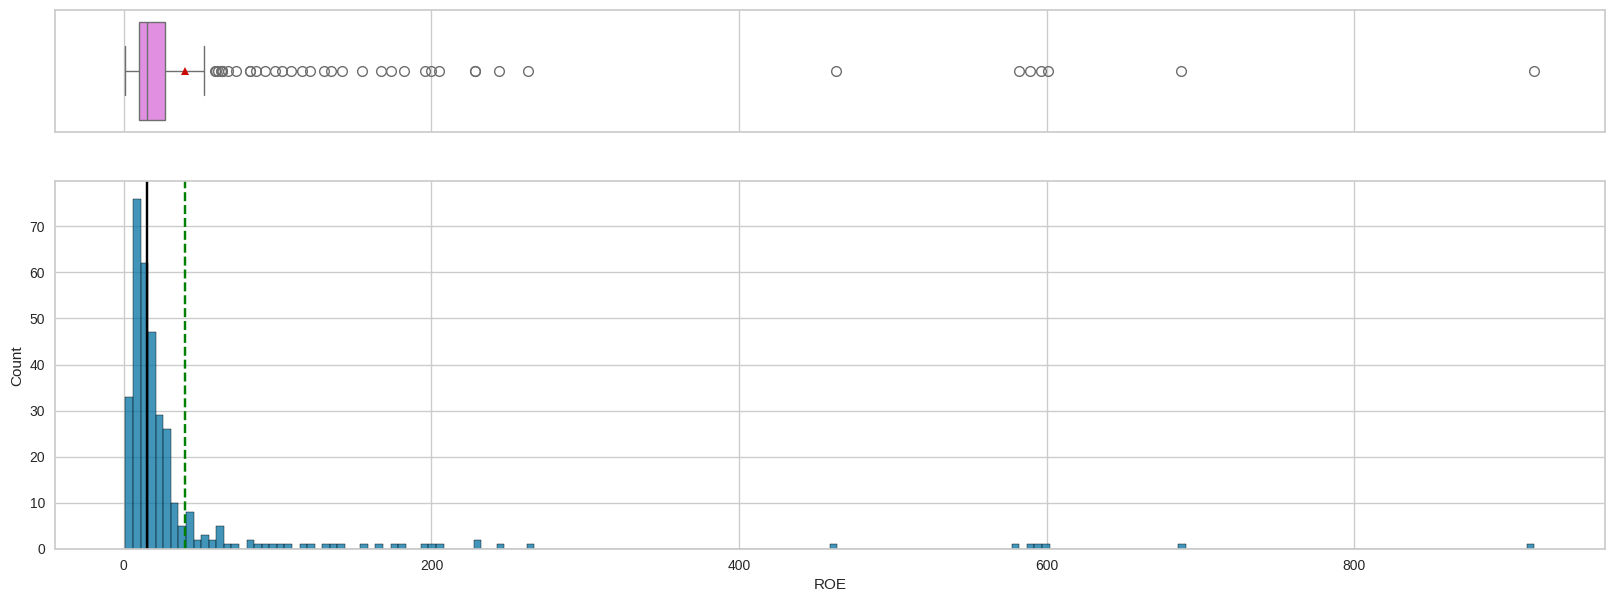

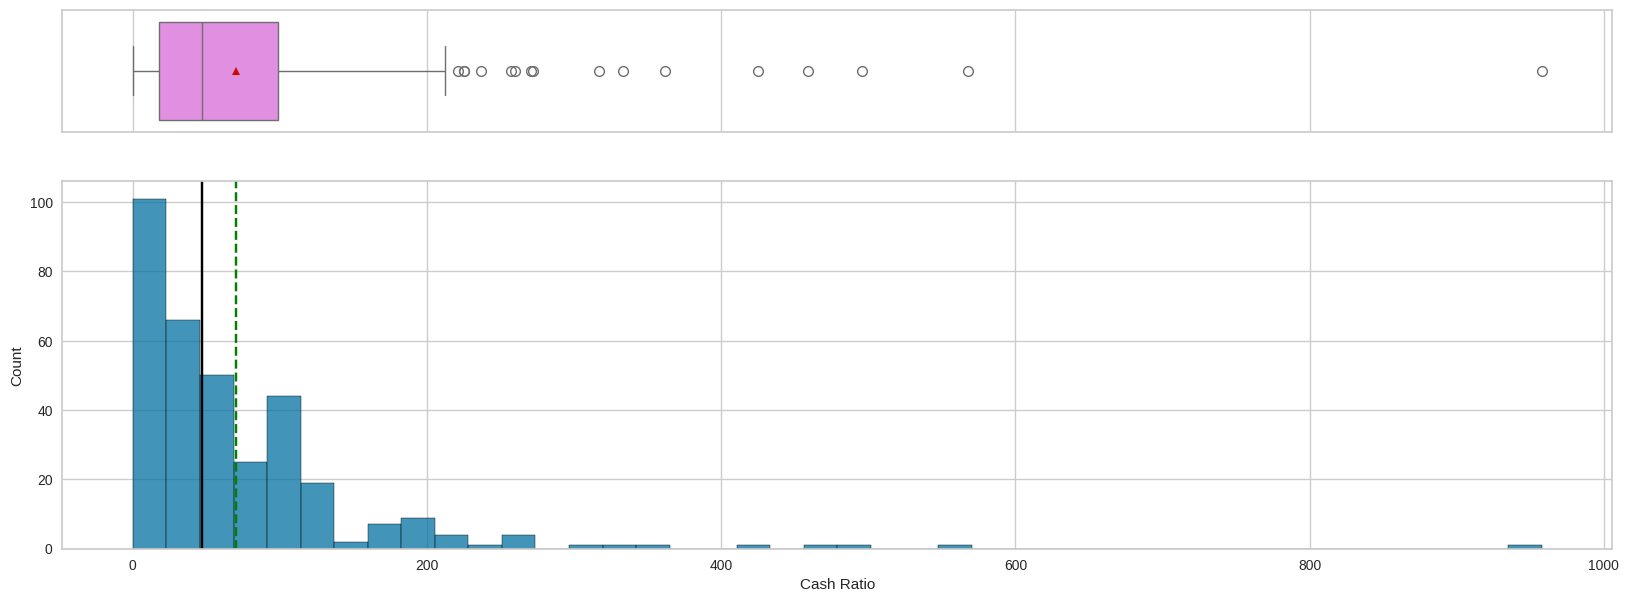

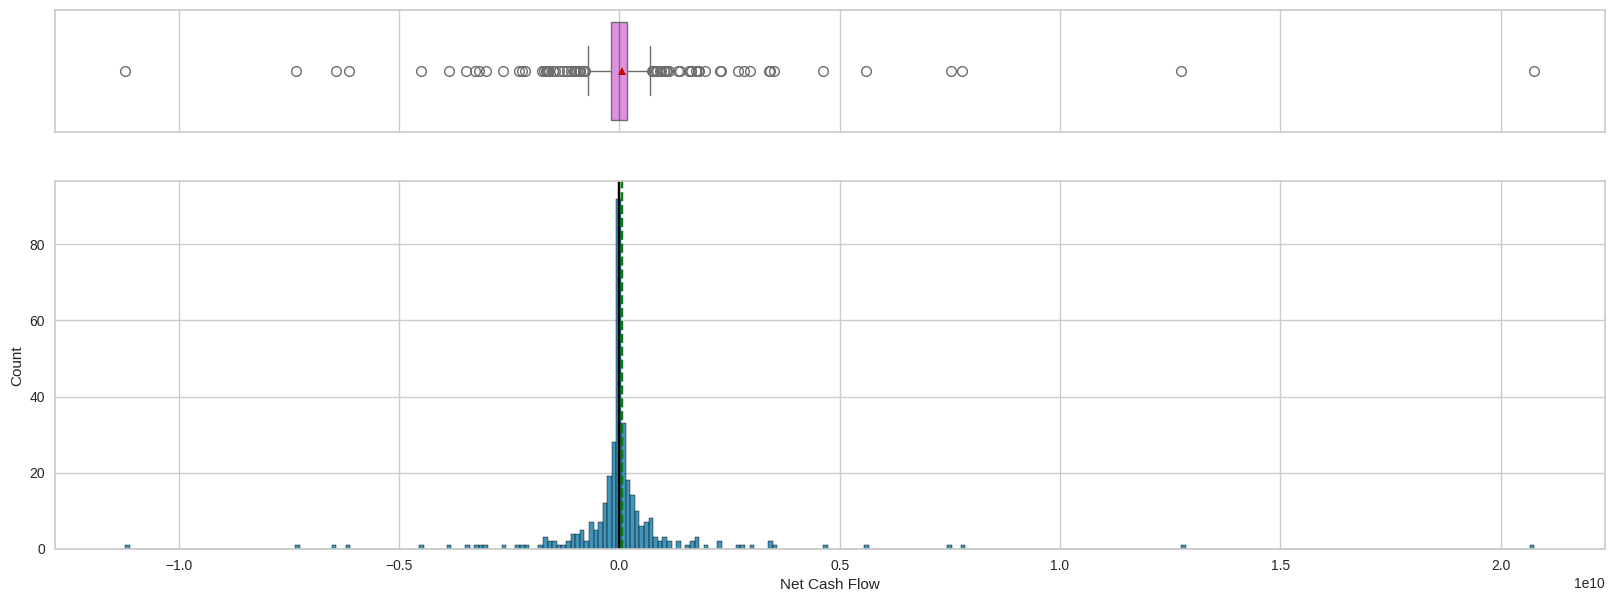

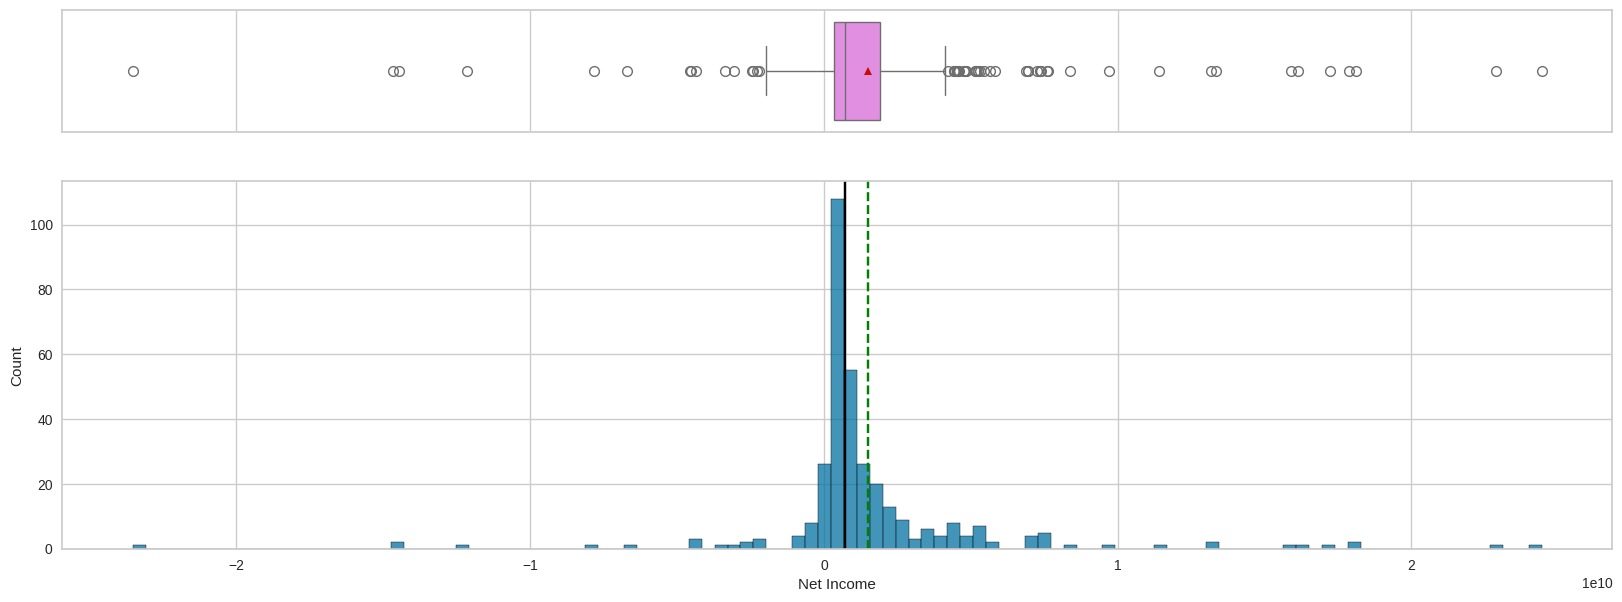

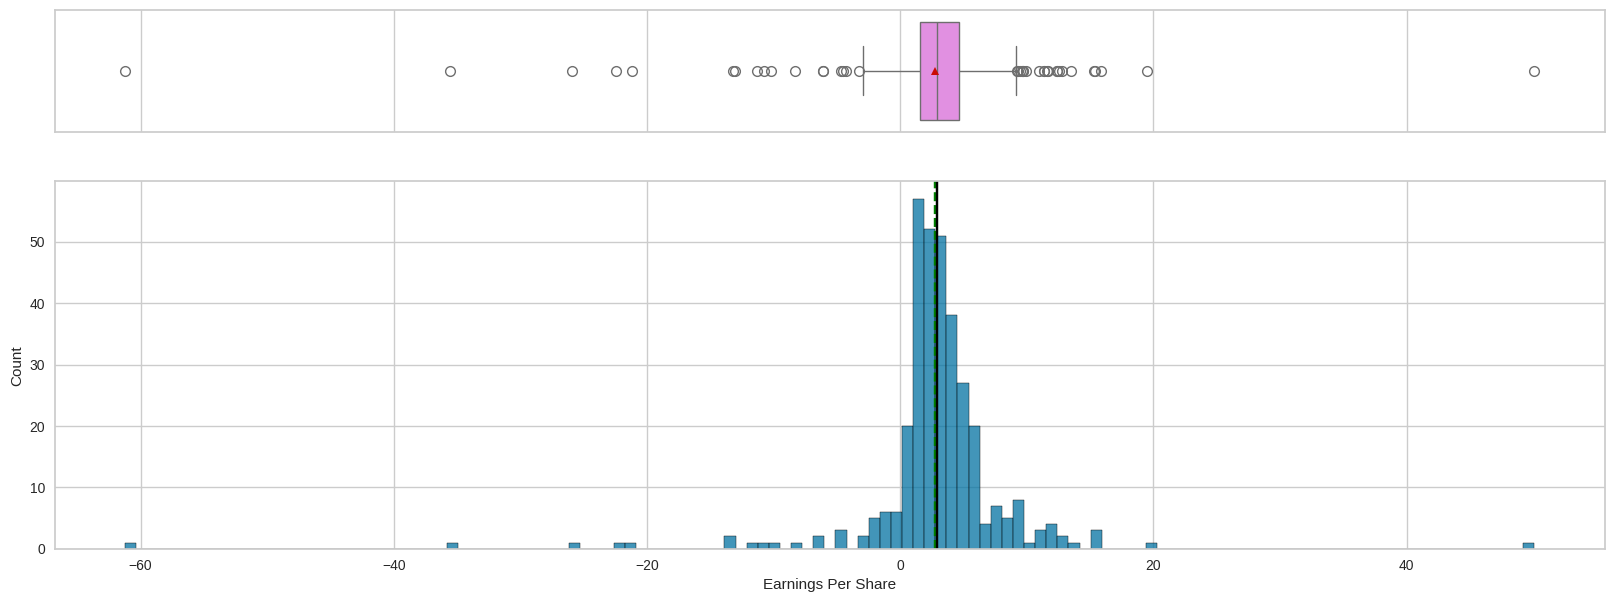

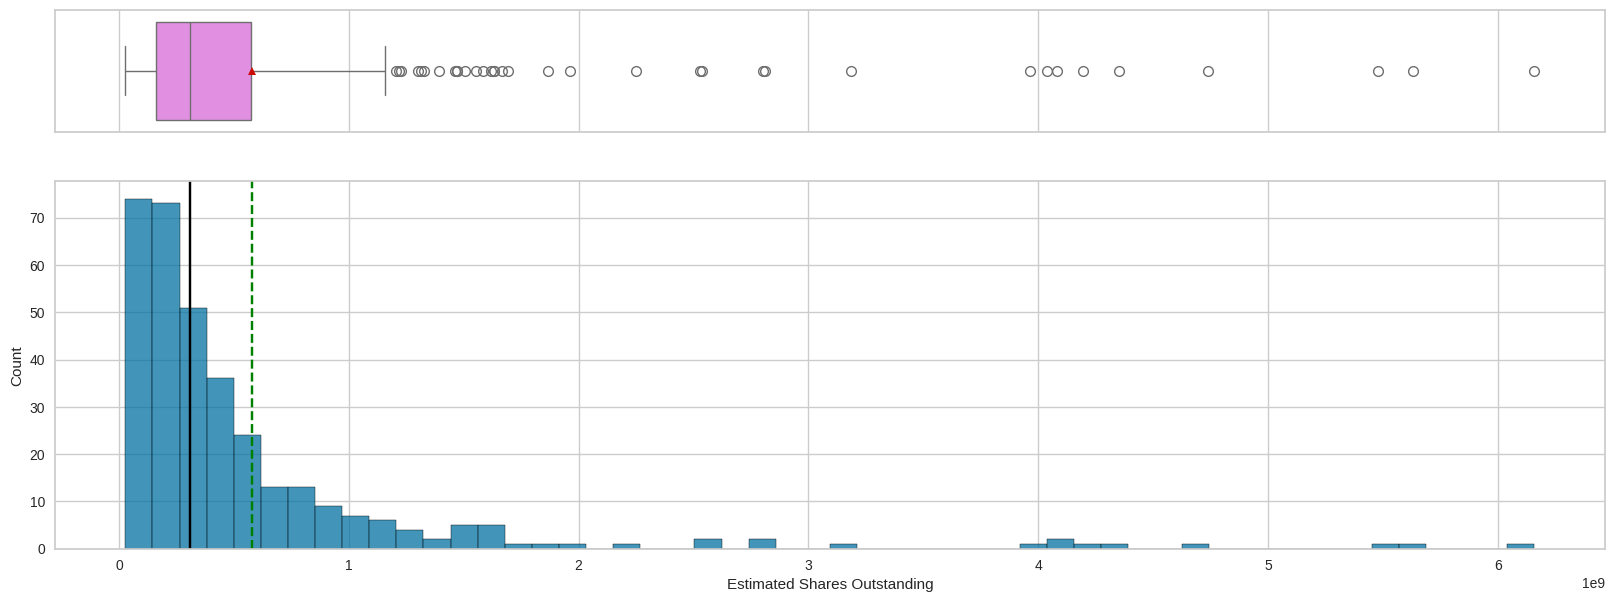

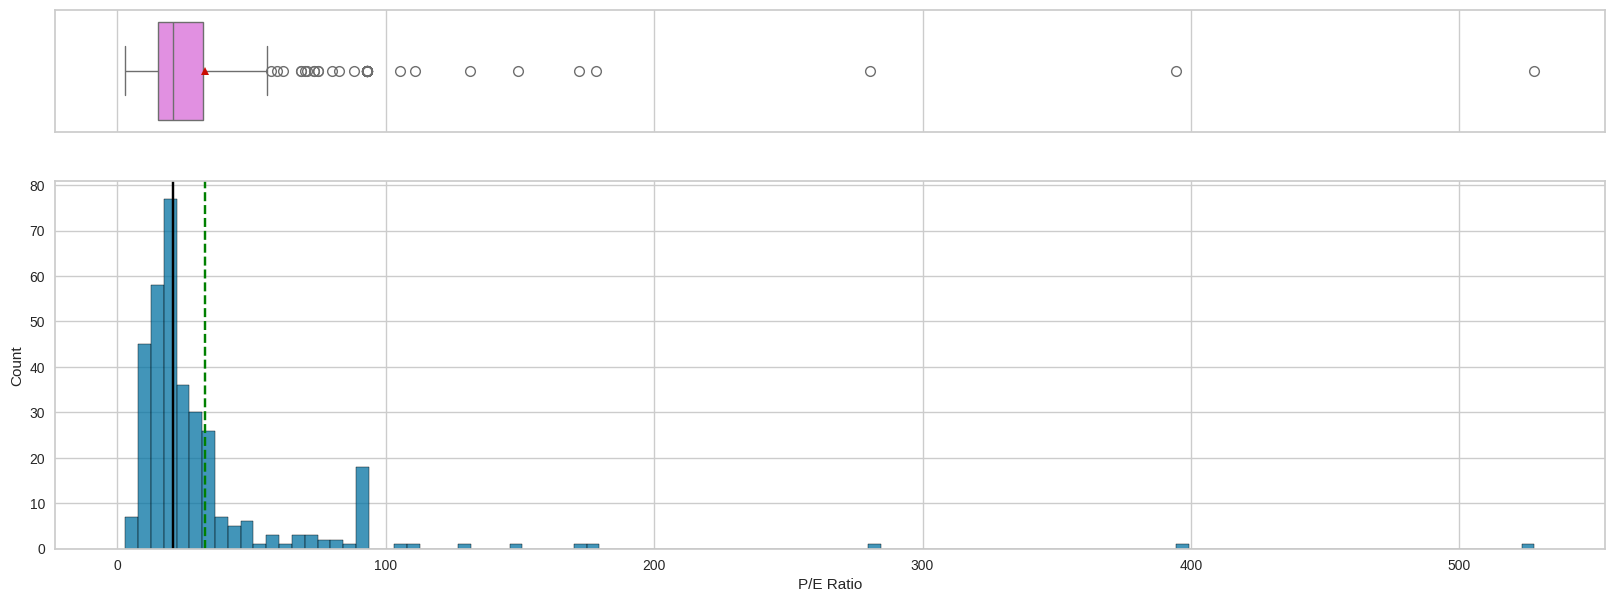

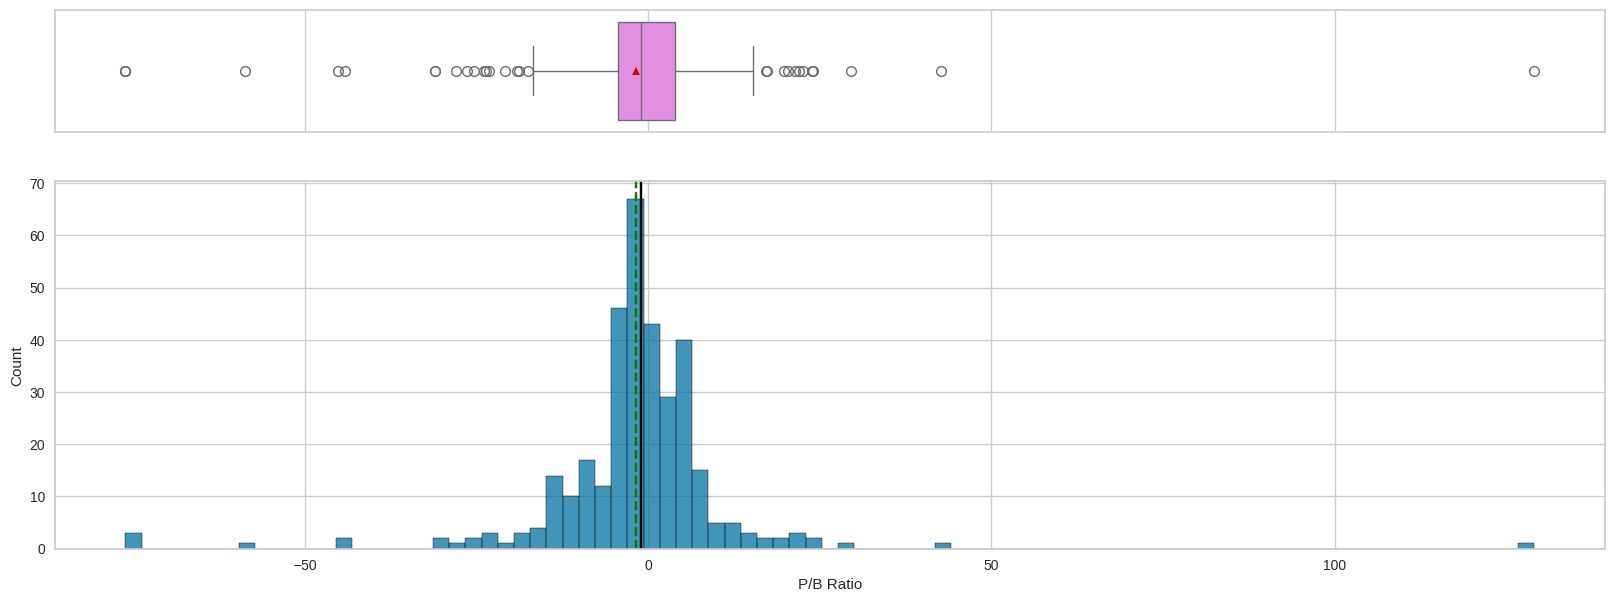

In [161]:
df_features = df.iloc[:,2:] #ignoring the first two features as they're identifiers for each stock

for feature in df_features:
  if df_features[feature].dtypes == 'object':
    labeled_barplot(df_features,feature)
  else:
    histogram_boxplot(df_features, feature)


**Observations**

*   Industrials and Financials make up ~30% of the companies listed
*   Current stock price is strongly positively skewed, which makes sense as this is relative to their number of shares and market cap
*   Looking at price change, this appears to have more of a normal distribution shape
*   Volatility, ROE, Cash Ratio, Estimated Shares Outstanding, and P/E ratio also appear to be positively skewed
*   However, net cash flow, net income, Earnings per share, and P/B ratio appear to have a normal distribution.
*   It's interesting to note that all features have outliers that we might consider capping for the extreme values.




### Bivariate Analysis

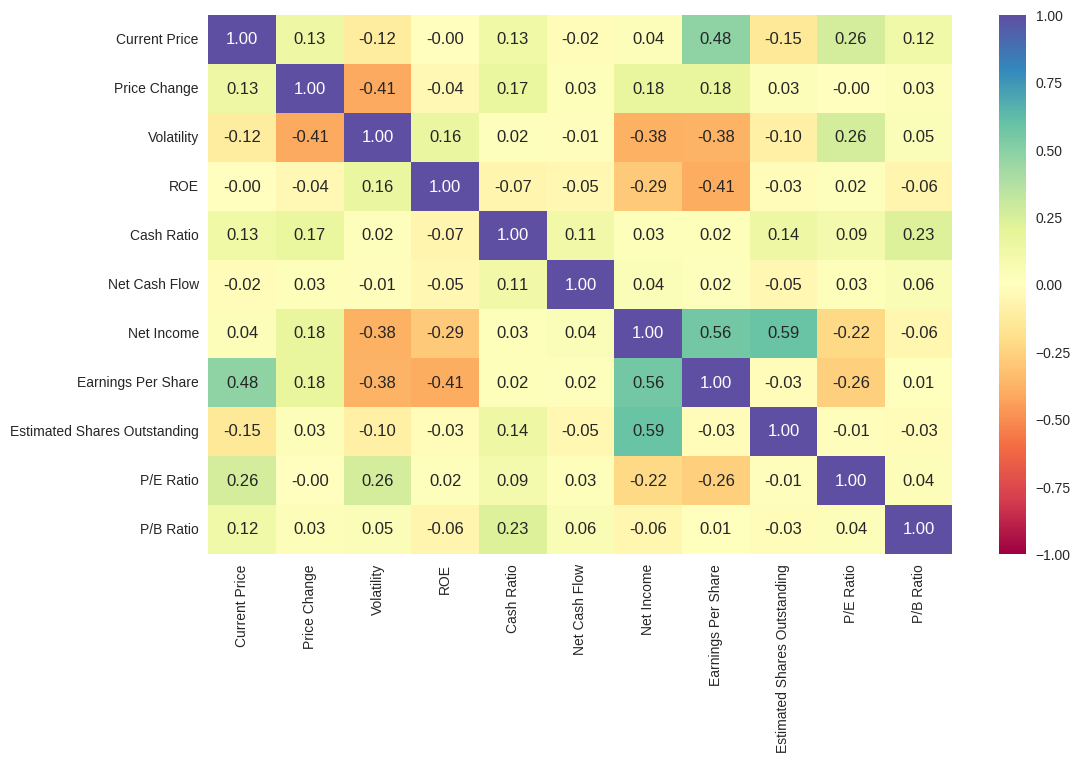

In [162]:
# drop numerical features that are categorical in nature

plt.figure(figsize=(12, 7))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

Let's look to see if we can identify some preliminary relatinoships based on their economic sector

In [163]:
sector_price_change = df.groupby('GICS Sector')['Price Change'].mean()
sector_price_change

GICS Sector
Consumer Discretionary          5.846093
Consumer Staples                8.684750
Energy                        -10.228289
Financials                      3.865406
Health Care                     9.585652
Industrials                     2.833127
Information Technology          7.217476
Materials                       5.589738
Real Estate                     6.205548
Telecommunications Services     6.956980
Utilities                       0.803657
Name: Price Change, dtype: float64

In [164]:
def sector_by_average_feature(data,x,y):
  plt.figure(figsize=(15, 8))
  ax = sns.barplot(x=x, y=y, data=data, errorbar = None)
  plt.title('Average ' + str(x) + ' by ' + str(y))
  plt.xlabel(str(x))
  plt.ylabel(str(y))

  # Rotate x-axis ticks
  plt.xticks(rotation=45)

  # Annotate each bar
  for p in ax.patches:
      ax.text(p.get_width(), p.get_y() + p.get_height() / 2.,
              '{0:.2f}'.format(p.get_width()),
              ha='left',
              va='center')

  plt.show()

In [165]:
def sector_by_average_feature_h(data, x, y):
    plt.figure(figsize=(15, 8))
    ax = sns.barplot(x=x, y=y, data=data, errorbar=None)
    plt.title('Average ' + str(x) + ' by ' + str(y))
    plt.xlabel(str(x))
    plt.ylabel(str(y))

    # Rotate x-axis ticks
    plt.xticks(rotation=45)

    #annotate values
    for p in ax.patches:
      ax.annotate(format(p.get_height(), '.2f'),
       (p.get_x() + p.get_width() / 2,
        p.get_height()), ha='center', va='center',
                  xytext=(0, 8),
                  textcoords='offset points')

    plt.show()

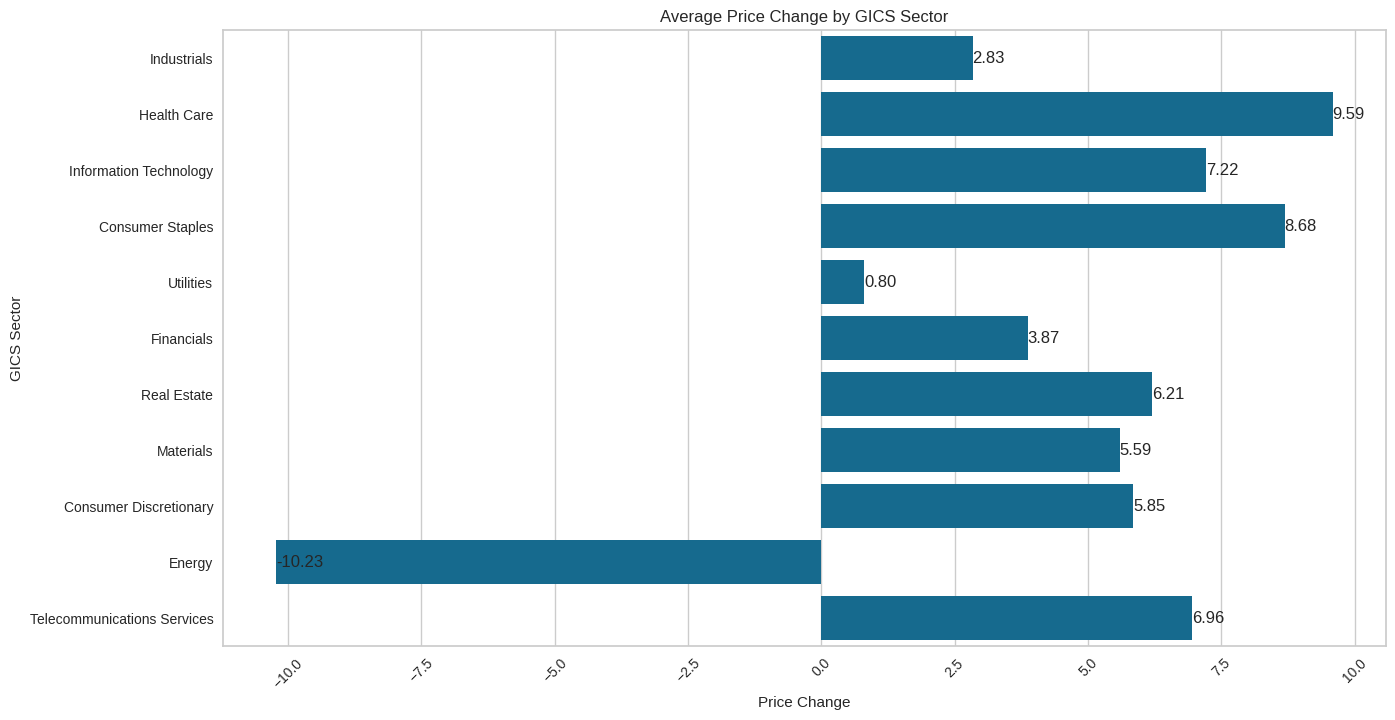

In [166]:
sector_by_average_feature(df,'Price Change','GICS Sector')

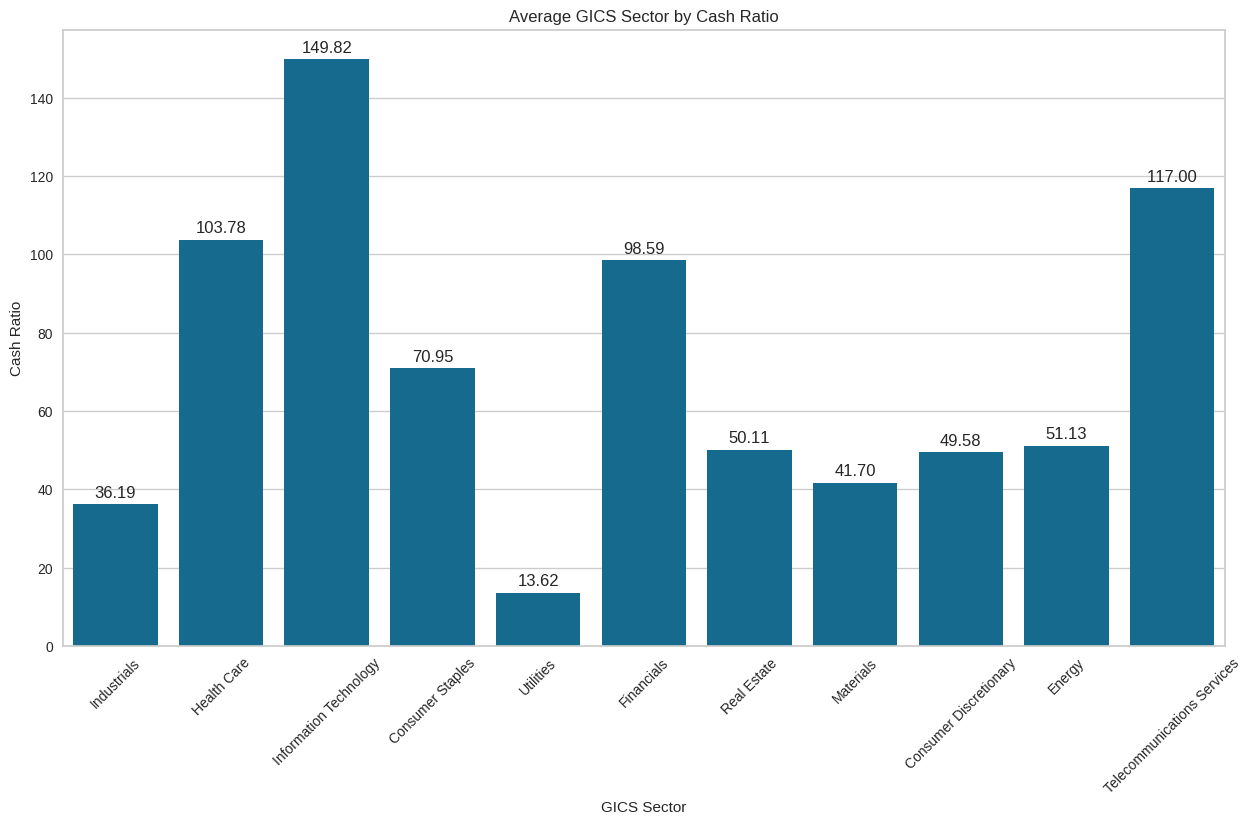

In [167]:
sector_by_average_feature_h(df,'GICS Sector','Cash Ratio')

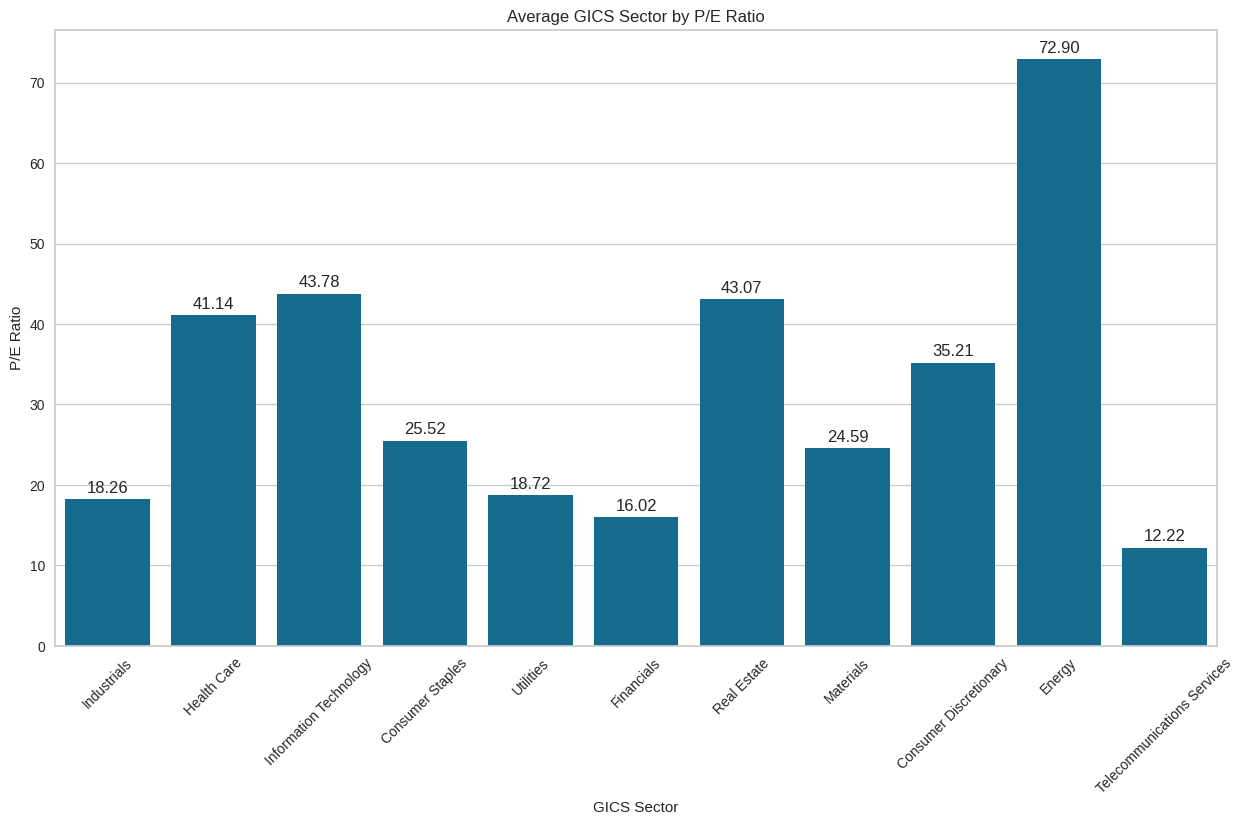

In [168]:
sector_by_average_feature_h(df,'GICS Sector','P/E Ratio')

## Data Preprocessing

- Duplicate value check
- Missing value treatment
- Outlier check
- Feature engineering (if needed)
- Any other preprocessing steps (if needed)

#### Duplicate Values

In [169]:
# Check for duplicates based on 'Ticker Symbol'
duplicates = df.duplicated(subset=['Ticker Symbol'], keep=False)

# Check the number of duplicates found
num_duplicates = duplicates.sum()
num_duplicates

0

#### Handling Outliers

In [170]:
#removing the labels for the ticker names
df_no_tickers = df.drop(columns = ['Ticker Symbol', 'Security', 'GICS Sub Industry']) #also dropping GICS Sub Industry due to its sparsity
df_no_tickers.head()

,GICS Sector,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
0,Industrials,42.349998,9.999995,1.687151,135,51,-604000000,7610000000,11.39,6.681299e+08,3.718174,-8.784219
1,Health Care,59.240002,8.339433,2.197887,130,77,51000000,5144000000,3.15,1.633016e+09,18.806350,-8.750068
2,Health Care,44.910000,11.301121,1.273646,21,67,938000000,4423000000,2.94,1.504422e+09,15.275510,-0.394171
3,Information Technology,93.940002,13.977195,1.357679,9,180,-240840000,629551000,1.26,4.996437e+08,74.555557,4.199651
4,Information Technology,55.320000,-1.827858,1.701169,14,272,315120000,696878000,0.31,2.247994e+09,178.451613,1.059810


In [171]:
numerical_columns = df_no_tickers.select_dtypes(include=['number']).columns.tolist()
numerical_columns

['Current Price',
 'Price Change',
 'Volatility',
 'ROE',
 'Cash Ratio',
 'Net Cash Flow',
 'Net Income',
 'Earnings Per Share',
 'Estimated Shares Outstanding',
 'P/E Ratio',
 'P/B Ratio']

In [172]:
categorical_columns = df_no_tickers.select_dtypes(include=['object']).columns.tolist()
categorical_columns

['GICS Sector']

handling outliers is important as it'll significantly skew our data when implement unsupervised learning models. As a result, I'll cap the outliers at the 1 and 99 percentile.

In [173]:
#capping outliers at their 1st and 99th percentile
outliers = df_no_tickers[numerical_columns].apply(lambda x: ((x - x.quantile(0.25)) / (x.quantile(0.75) - x.quantile(0.25))).abs() > 3)

# Count outliers in each numerical column
outlier_counts = outliers.sum()
outlier_counts

Current Price                   14
Price Change                     6
Volatility                      15
ROE                             36
Cash Ratio                      10
Net Cash Flow                   53
Net Income                      39
Earnings Per Share              26
Estimated Shares Outstanding    28
P/E Ratio                       38
P/B Ratio                       16
dtype: int64

In [174]:
# Handling outliers: Remove or cap (for demonstration, we'll cap values to the 1st and 99th percentiles for selected features)
for col in numerical_columns:
    percentiles = df_no_tickers[col].quantile([0.01, 0.99]).values
    df_no_tickers[col] = df_no_tickers[col].clip(lower=percentiles[0], upper=percentiles[1])

# Define the ColumnTransformer to scale numerical features and encode categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),
        ('cat', OneHotEncoder(), categorical_columns)
    ])


# Apply the transformations
data_preprocessed = preprocessor.fit_transform(df_no_tickers)

feature_names = preprocessor.get_feature_names_out()

# The result is a NumPy array. For demonstration, let's check the shape of the transformed data
data_preprocessed.shape

(340, 22)

## EDA

- It is a good idea to explore the data once again after manipulating it.

In [175]:
# Convert the preprocessed data to a DataFrame
df_preprocessed = pd.DataFrame(data_preprocessed, columns=feature_names)
df_preprocessed.head(10)  # Display the first few rows to verify

,num__Current Price,num__Price Change,num__Volatility,num__ROE,num__Cash Ratio,num__Net Cash Flow,num__Net Income,num__Earnings Per Share,num__Estimated Shares Outstanding,num__P/E Ratio,...,cat__GICS Sector_Consumer Staples,cat__GICS Sector_Energy,cat__GICS Sector_Financials,cat__GICS Sector_Health Care,cat__GICS Sector_Industrials,cat__GICS Sector_Information Technology,cat__GICS Sector_Materials,cat__GICS Sector_Real Estate,cat__GICS Sector_Telecommunications Services,cat__GICS Sector_Utilities
0,-0.488922,0.520415,0.291560,1.111332,-0.223265,-0.460942,1.770100,1.774006,0.129854,-0.860697,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,-0.257520,0.374217,1.190631,1.053841,0.118701,0.024025,1.052842,0.066476,1.361269,-0.406345,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.453848,0.634968,-0.436351,-0.199463,-0.012825,0.680766,0.843132,0.022959,1.197154,-0.527625,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.217890,0.870573,-0.288424,-0.337441,1.473414,-0.192056,-0.260226,-0.325178,-0.085173,1.508580,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,-0.311226,-0.520924,0.316236,-0.279950,2.683449,0.219581,-0.240644,-0.522041,2.146121,4.990375,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5,-0.566604,-1.418013,-0.008857,-0.325943,-0.249570,-0.153673,0.094461,0.033320,0.066381,-0.630945,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,2.720022,0.184915,-0.712143,-0.095979,-0.565232,0.053556,-0.269827,1.260090,-0.637386,0.013882,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
7,-0.476865,-0.168558,-0.699451,-0.337441,-0.709910,0.198761,-0.258350,-0.047497,-0.410647,-0.481205,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8,-0.270809,-0.151185,-0.797504,-0.314445,-0.775673,-0.003444,0.153593,0.062332,-0.184394,-0.418360,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9,-0.248477,-0.093480,-0.833046,-0.279950,0.408057,-0.241782,0.293409,0.632199,-0.173055,-0.702407,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## K-means Clustering

Number of Clusters: 1 	Average Distortion: 2.979563326579758
Number of Clusters: 2 	Average Distortion: 2.789062344541065
Number of Clusters: 3 	Average Distortion: 2.673753784089705
Number of Clusters: 4 	Average Distortion: 2.5673358307281497
Number of Clusters: 5 	Average Distortion: 2.4965866937105003
Number of Clusters: 6 	Average Distortion: 2.420753863013504
Number of Clusters: 7 	Average Distortion: 2.3565861533347663
Number of Clusters: 8 	Average Distortion: 2.2901991232863805


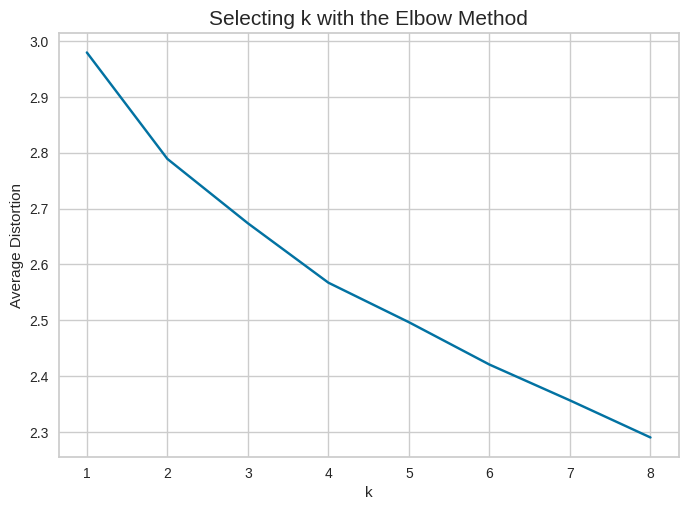

In [176]:
clusters = range(1, 9) #selecting range of clusters to test
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters=k)
    model.fit(df_preprocessed)
    prediction = model.predict(df_preprocessed)
    distortion = (sum(np.min(cdist(df_preprocessed, model.cluster_centers_, "euclidean"), axis=1))/df_preprocessed.shape[0])

    meanDistortions.append(distortion)

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")
plt.ylabel("Average Distortion")
plt.title("Selecting k with the Elbow Method", fontsize=15);

Although the appropriate number of elbows seems to be 4, the elbow isn't as pronounced. Let's try additional techniques to further validate this. Let's look at the silhouette scores

For n_clusters = 2, silhouette score is 0.38257494127209785
For n_clusters = 3, silhouette score is 0.38984081083347766
For n_clusters = 4, silhouette score is 0.3549833563698148
For n_clusters = 5, silhouette score is 0.36707087729674776
For n_clusters = 6, silhouette score is 0.3401233563172837
For n_clusters = 7, silhouette score is 0.10592305710707585
For n_clusters = 8, silhouette score is 0.1675100264761555
For n_clusters = 9, silhouette score is 0.2218827326137277


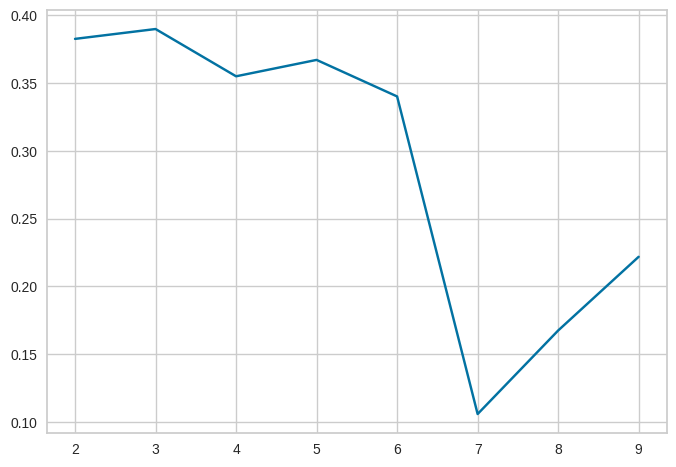

In [177]:
sil_score = []
cluster_list = list(range(2, 10))
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict((df_preprocessed))
    # centers = clusterer.cluster_centers_
    score = silhouette_score(df_preprocessed, preds)
    sil_score.append(score)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

plt.plot(cluster_list, sil_score)

It appears that according to the silhouette score, our best approach would be to select 4 or 5 clusters. However, we'll also evaluate using hierarchical clustering to define the number of clusters to usse.

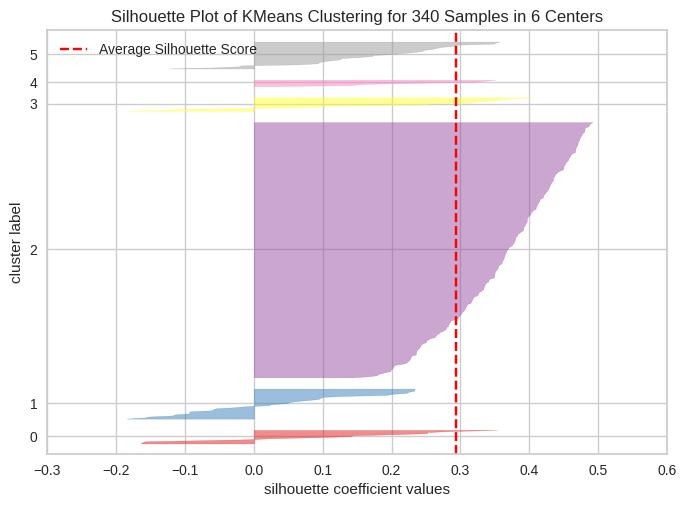

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 340 Samples in 6 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [178]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(6, random_state=1))
visualizer.fit(df_preprocessed)
visualizer.show()

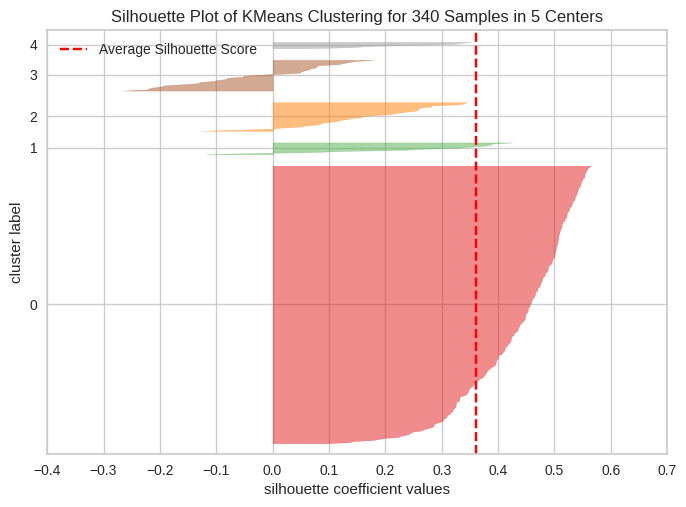

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 340 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [179]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(5, random_state=1))
visualizer.fit(df_preprocessed)
visualizer.show()

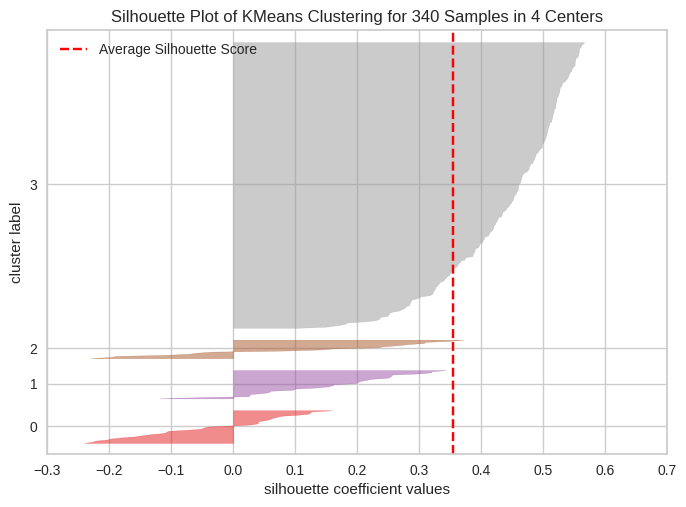

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 340 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [180]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(4, random_state=1))
visualizer.fit(df_preprocessed)
visualizer.show()

### Selecting final model

**Let's take 4 as the appropriate no. of clusters as the silhouette score is high enough and we can see it bend at around 4 as well.**

In [181]:
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(df_preprocessed)

KMeans(n_clusters=4, random_state=0)

In [182]:
df_kmeans = df.copy()

# adding kmeans cluster labels to the original dataframe
df_kmeans["K_means_segments"] = kmeans.labels_

### Cluster Profiling

In [183]:
cluster_profile_k_means = df_kmeans.groupby("K_means_segments").mean()

In [184]:
cluster_profile_k_means["count_in_each_segment"] = (
    df_kmeans.groupby("K_means_segments")["GICS Sector"].count().values
)

In [185]:
# let's display cluster profiles
cluster_profile_k_means.style.highlight_max(color="lightgreen", axis=0)

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,count_in_each_segment
K_means_segments,,,,,,,,,,,,
0,70.940621,4.926929,1.388771,34.405303,50.553030,12789651.515152,1353274943.181818,3.584489,404531162.620947,23.214785,-3.497062,264
1,217.013010,12.691672,1.726079,25.645161,257.387097,458424129.032258,924269774.193548,5.538387,553773354.867742,69.837647,12.529596,31
2,38.235926,-15.120923,2.876296,106.814815,49.851852,-157215740.740741,-3892117888.888889,-9.521852,497934018.682963,93.204993,1.087537,27
3,55.838889,5.594423,1.168219,38.944444,63.166667,307777777.777778,12625611111.111111,4.620000,3265678633.283333,15.448134,-4.375634,18


In [186]:
len(df_kmeans.select_dtypes(include=['object']).columns)


4

In [187]:
df_kmeans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticker Symbol                 340 non-null    object 
 1   Security                      340 non-null    object 
 2   GICS Sector                   340 non-null    object 
 3   GICS Sub Industry             340 non-null    object 
 4   Current Price                 340 non-null    float64
 5   Price Change                  340 non-null    float64
 6   Volatility                    340 non-null    float64
 7   ROE                           340 non-null    int64  
 8   Cash Ratio                    340 non-null    int64  
 9   Net Cash Flow                 340 non-null    int64  
 10  Net Income                    340 non-null    int64  
 11  Earnings Per Share            340 non-null    float64
 12  Estimated Shares Outstanding  340 non-null    float64
 13  P/E R

In [188]:
len(df_kmeans.select_dtypes(include=['number']).columns)


12

In [189]:
df_kmeans.select_dtypes(include=['float']).columns

Index(['Current Price', 'Price Change', 'Volatility', 'Earnings Per Share',
       'Estimated Shares Outstanding', 'P/E Ratio', 'P/B Ratio'],
      dtype='object')

In [190]:
len(numerical_columns)

11

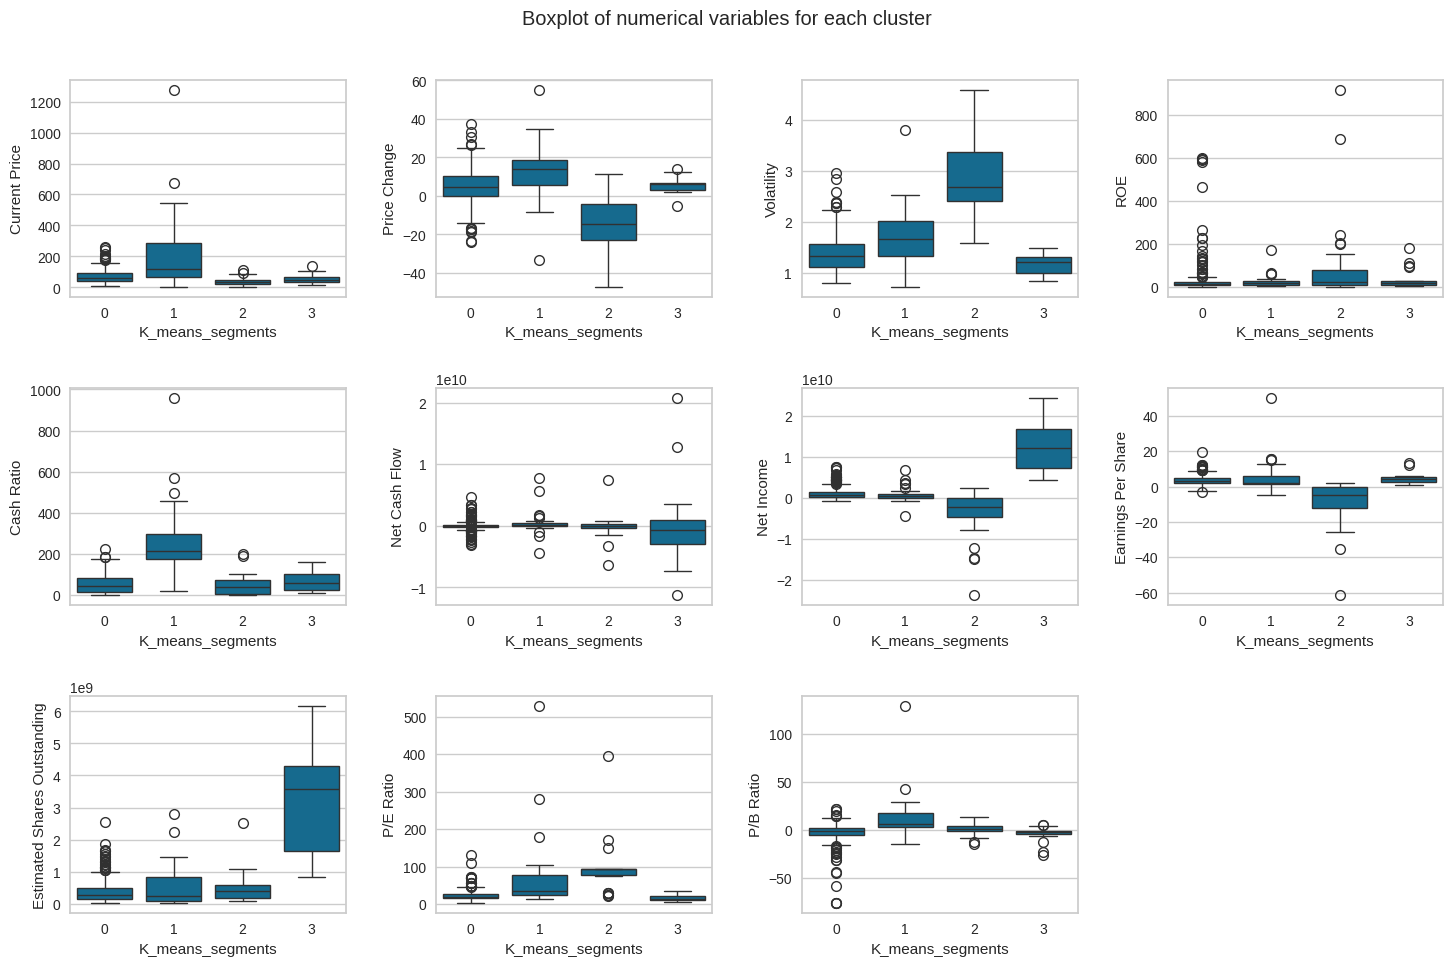

In [191]:
plt.figure(figsize=(15, 10))
plt.suptitle("Boxplot of numerical variables for each cluster")

for i, variable in enumerate(numerical_columns):
    plt.subplot(3, 4, i+1)
    sns.boxplot(data=df_kmeans, x="K_means_segments", y=variable)

plt.tight_layout(pad=2.0)

<Axes: xlabel='K_means_segments'>

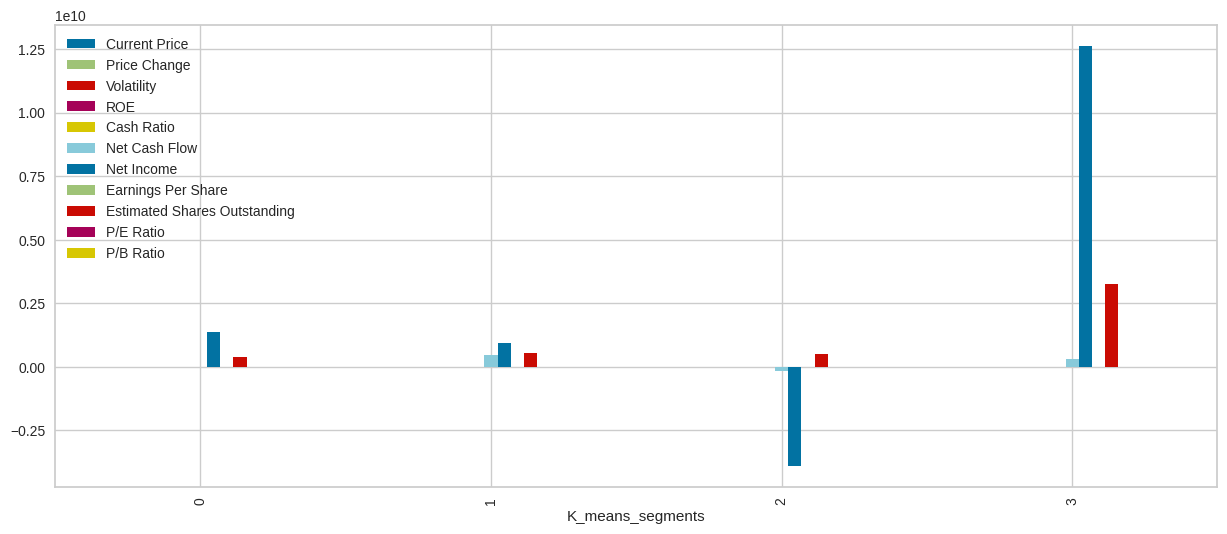

In [192]:
df_kmeans.groupby("K_means_segments").mean().plot.bar(figsize=(15, 6))

## Hierarchical Clustering

For hierarchical clustering, we first want to understand what the right choice of dendogram is for our hierarchical clusters. To do so, we'll evaluate the cophenetic correlation to see which is the best one.

### Cophenetic Correlation

In [193]:
# list of distance metrics
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"]

# list of linkage methods
linkage_methods = ["single", "complete", "average", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(df_preprocessed, metric=dm, method=lm)
        c, coph_dists = cophenet(Z, pdist(df_preprocessed))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm

Cophenetic correlation for Euclidean distance and single linkage is 0.8931940091165135.
Cophenetic correlation for Euclidean distance and complete linkage is 0.7228525415958059.
Cophenetic correlation for Euclidean distance and average linkage is 0.9004060530504792.
Cophenetic correlation for Euclidean distance and weighted linkage is 0.8311814863603215.
Cophenetic correlation for Chebyshev distance and single linkage is 0.8565245237302862.
Cophenetic correlation for Chebyshev distance and complete linkage is 0.6998836663712658.
Cophenetic correlation for Chebyshev distance and average linkage is 0.8902700932378723.
Cophenetic correlation for Chebyshev distance and weighted linkage is 0.8232627025013347.
Cophenetic correlation for Mahalanobis distance and single linkage is 0.463047772826683.
Cophenetic correlation for Mahalanobis distance and complete linkage is 0.5982571969164603.
Cophenetic correlation for Mahalanobis distance and average linkage is 0.7371882417763309.
Cophenetic cor

In [194]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.9004060530504792, which is obtained with Euclidean distance and average linkage.


**Let's explore different linkage methods with Euclidean distance only.**

In [195]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for lm in linkage_methods:
    Z = linkage(df_preprocessed, metric="euclidean", method=lm)
    c, coph_dists = cophenet(Z, pdist(df_preprocessed))
    print("Cophenetic correlation for {} linkage is {}.".format(lm, c))
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm[0] = "euclidean"
        high_dm_lm[1] = lm

Cophenetic correlation for single linkage is 0.8931940091165135.
Cophenetic correlation for complete linkage is 0.7228525415958059.
Cophenetic correlation for average linkage is 0.9004060530504792.
Cophenetic correlation for centroid linkage is 0.9002782922547108.
Cophenetic correlation for ward linkage is 0.670693147530388.
Cophenetic correlation for weighted linkage is 0.8311814863603215.


In [196]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} linkage.".format(
        high_cophenet_corr, high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.9004060530504792, which is obtained with average linkage.


**We see that the cophenetic correlation is maximum with Euclidean distance and the average linkage.**

### Checking Dendrograms

**Let's see the dendrograms for the different linkage methods.**

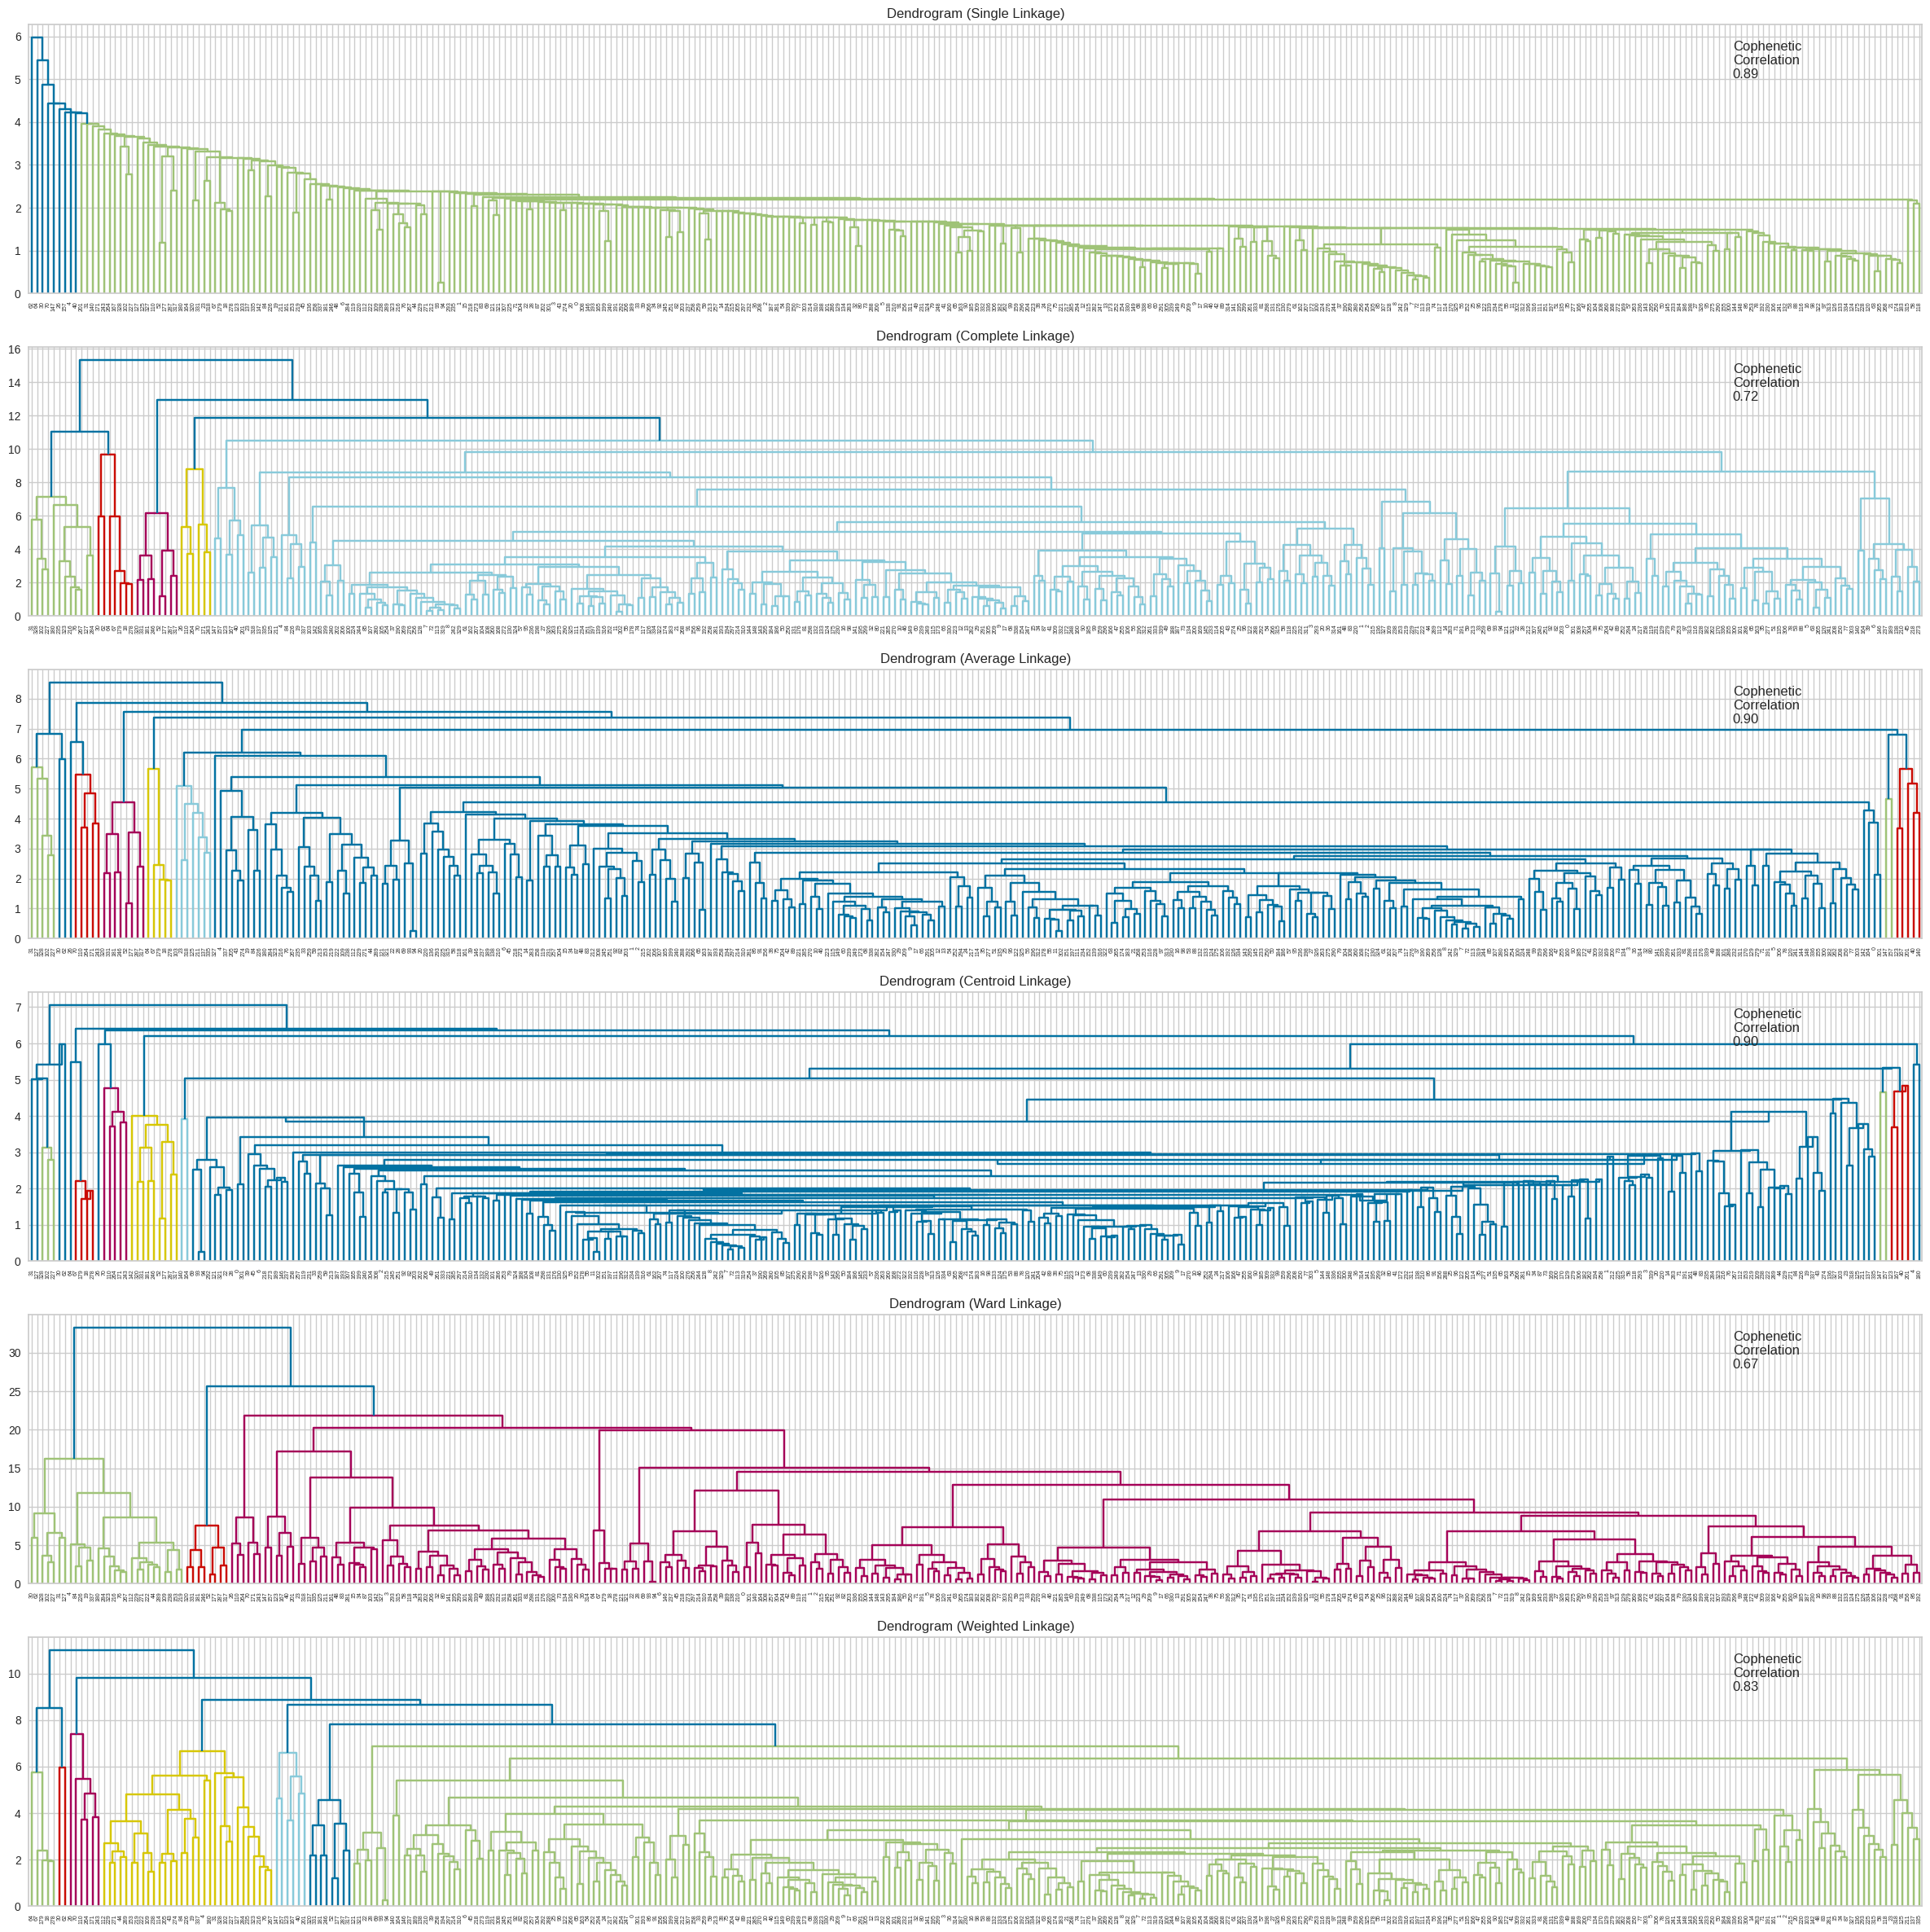

In [197]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(30, 30))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(df_preprocessed, metric="euclidean", method=method)

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(df_preprocessed))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.90, 0.80),
        xycoords="axes fraction",
    )

**Observations**

 - We can see that either both the Average and Centroid Linkage offer the highest ocphenetic correlation at 0.9.
 - Based on marginal differences, we'll use the average linkage with euclidean distance in our model.
 - In addition, the optimal amount of clusters we will use is 4

### Creating Model using sklearn

In [198]:
HCmodel = AgglomerativeClustering(n_clusters=4, affinity="euclidean", linkage="average")
HCmodel.fit(df_preprocessed)

AgglomerativeClustering(affinity='euclidean', linkage='average', n_clusters=4)

In [199]:
df_preprocessed["HC_Clusters"] = HCmodel.labels_

df1 = df.copy()
df1["HC_Clusters"] = HCmodel.labels_

### Cluster Profiling

In [200]:
cluster_profile = df1.groupby("HC_Clusters").mean()

In [201]:
cluster_profile

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
HC_Clusters,,,,,,,,,,,
0,72.121810,4.409966,1.504357,33.934169,68.485893,1.769326e+08,1.423442e+09,3.178103,4.860295e+08,30.214780,-1.977658
1,36.894286,-16.052769,2.991423,335.142857,55.714286,-1.151497e+09,-1.104085e+10,-27.252857,4.685633e+08,73.809474,0.291131
2,637.019989,8.012558,1.573194,15.500000,181.500000,2.304597e+08,8.392653e+08,15.326667,1.242687e+08,133.383531,17.821093
3,50.744999,5.512605,1.070356,24.875000,60.250000,-3.860125e+09,1.578288e+10,3.632500,4.640083e+09,16.598649,-7.787061


In [202]:
cluster_profile["count_in_each_segments"] = (
    df1.groupby("HC_Clusters")["GICS Sector"].count().values
)
cluster_profile

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,count_in_each_segments
HC_Clusters,,,,,,,,,,,,
0,72.121810,4.409966,1.504357,33.934169,68.485893,1.769326e+08,1.423442e+09,3.178103,4.860295e+08,30.214780,-1.977658,319
1,36.894286,-16.052769,2.991423,335.142857,55.714286,-1.151497e+09,-1.104085e+10,-27.252857,4.685633e+08,73.809474,0.291131,7
2,637.019989,8.012558,1.573194,15.500000,181.500000,2.304597e+08,8.392653e+08,15.326667,1.242687e+08,133.383531,17.821093,6
3,50.744999,5.512605,1.070356,24.875000,60.250000,-3.860125e+09,1.578288e+10,3.632500,4.640083e+09,16.598649,-7.787061,8


In [203]:
# let's see the names of the countries in each cluster
for cl in df1["HC_Clusters"].unique():
    print("In cluster {}, the following stocks are present:".format(cl))
    print(df1[df1["HC_Clusters"] == cl]["Security"].unique())
    print()

In cluster 0, the following stocks are present:
['American Airlines Group' 'AbbVie' 'Abbott Laboratories'
 'Adobe Systems Inc' 'Analog Devices, Inc.' 'Archer-Daniels-Midland Co'
 'Alliance Data Systems' 'Ameren Corp' 'American Electric Power'
 'AFLAC Inc' 'American International Group, Inc.'
 'Apartment Investment & Mgmt' 'Assurant Inc' 'Arthur J. Gallagher & Co.'
 'Akamai Technologies Inc' 'Albemarle Corp' 'Alaska Air Group Inc'
 'Allstate Corp' 'Allegion' 'Alexion Pharmaceuticals'
 'Applied Materials Inc' 'AMETEK Inc' 'Affiliated Managers Group Inc'
 'Amgen Inc' 'Ameriprise Financial' 'American Tower Corp A'
 'AutoNation Inc' 'Anthem Inc.' 'Aon plc' 'Amphenol Corp' 'Arconic Inc'
 'Activision Blizzard' 'AvalonBay Communities, Inc.' 'Broadcom'
 'American Water Works Company Inc' 'American Express Co' 'Boeing Company'
 'Bank of America Corp' 'Baxter International Inc.' 'BB&T Corporation'
 'Bard (C.R.) Inc.' 'Baker Hughes Inc' 'BIOGEN IDEC Inc.'
 'The Bank of New York Mellon Corp.' 'Ball

We can see that the vast majority of securities are concentrated in cluster 0. This is not a good representation of the clustering method used, so we will try and use another methodology to see if this will improve the clustering separation

## Creating Final Model

In [204]:
HCmodel = AgglomerativeClustering(n_clusters=4, affinity="euclidean", linkage="ward")
HCmodel.fit(df_preprocessed)

AgglomerativeClustering(affinity='euclidean', n_clusters=4)

In [205]:
subset_scaled_df = df_preprocessed.copy()
df2 = df.copy()

In [206]:
subset_scaled_df["HC_Clusters"] = HCmodel.labels_
df2["HC_Clusters"] = HCmodel.labels_

### Cluster Profiling

In [207]:
cluster_profile2 = df2.groupby("HC_Clusters").mean()

In [208]:
cluster_profile2

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
HC_Clusters,,,,,,,,,,,
0,73.570293,5.472669,1.426182,34.731544,68.372483,1.990490e+08,1.622810e+09,3.628641,4.797124e+08,23.807184,-2.098230
1,47.898929,-12.015921,2.708130,100.750000,66.500000,-3.905555e+08,-3.814474e+09,-9.224643,5.488953e+08,109.308583,-0.127228
2,50.744999,5.512605,1.070356,24.875000,60.250000,-3.860125e+09,1.578288e+10,3.632500,4.640083e+09,16.598649,-7.787061
3,637.019989,8.012558,1.573194,15.500000,181.500000,2.304597e+08,8.392653e+08,15.326667,1.242687e+08,133.383531,17.821093


In [209]:
cluster_profile2["count_in_each_segments"] = (
    df2.groupby("HC_Clusters")["GICS Sector"].count().values
)
cluster_profile2

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,count_in_each_segments
HC_Clusters,,,,,,,,,,,,
0,73.570293,5.472669,1.426182,34.731544,68.372483,1.990490e+08,1.622810e+09,3.628641,4.797124e+08,23.807184,-2.098230,298
1,47.898929,-12.015921,2.708130,100.750000,66.500000,-3.905555e+08,-3.814474e+09,-9.224643,5.488953e+08,109.308583,-0.127228,28
2,50.744999,5.512605,1.070356,24.875000,60.250000,-3.860125e+09,1.578288e+10,3.632500,4.640083e+09,16.598649,-7.787061,8
3,637.019989,8.012558,1.573194,15.500000,181.500000,2.304597e+08,8.392653e+08,15.326667,1.242687e+08,133.383531,17.821093,6


In [210]:
# let's see the names of the countries in each cluster
for cl in df2["HC_Clusters"].unique():
    print("In cluster {}, the following stocks are present:".format(cl))
    print(df2[df2["HC_Clusters"] == cl]["Security"].unique())
    print()

In cluster 0, the following stocks are present:
['American Airlines Group' 'AbbVie' 'Abbott Laboratories'
 'Adobe Systems Inc' 'Archer-Daniels-Midland Co' 'Alliance Data Systems'
 'Ameren Corp' 'American Electric Power' 'AFLAC Inc'
 'American International Group, Inc.' 'Apartment Investment & Mgmt'
 'Assurant Inc' 'Arthur J. Gallagher & Co.' 'Akamai Technologies Inc'
 'Albemarle Corp' 'Alaska Air Group Inc' 'Allstate Corp' 'Allegion'
 'Applied Materials Inc' 'AMETEK Inc' 'Affiliated Managers Group Inc'
 'Amgen Inc' 'Ameriprise Financial' 'American Tower Corp A'
 'AutoNation Inc' 'Anthem Inc.' 'Aon plc' 'Amphenol Corp' 'Arconic Inc'
 'Activision Blizzard' 'AvalonBay Communities, Inc.' 'Broadcom'
 'American Water Works Company Inc' 'American Express Co' 'Boeing Company'
 'Bank of America Corp' 'Baxter International Inc.' 'BB&T Corporation'
 'Bard (C.R.) Inc.' 'BIOGEN IDEC Inc.' 'The Bank of New York Mellon Corp.'
 'Ball Corp' 'Bristol-Myers Squibb' 'Boston Scientific' 'BorgWarner'
 'Bost

**Now the clusters seem to have more variability.**

In [211]:
# lets display cluster profile
cluster_profile2.style.highlight_max(color="lightgreen", axis=0)

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,count_in_each_segments
HC_Clusters,,,,,,,,,,,,
0,73.570293,5.472669,1.426182,34.731544,68.372483,199048953.020134,1622810251.677852,3.628641,479712393.048523,23.807184,-2.098230,298
1,47.898929,-12.015921,2.708130,100.750000,66.500000,-390555535.714286,-3814474357.142857,-9.224643,548895304.122857,109.308583,-0.127228,28
2,50.744999,5.512605,1.070356,24.875000,60.250000,-3860125000.000000,15782875000.000000,3.632500,4640082627.625000,16.598649,-7.787061,8
3,637.019989,8.012558,1.573194,15.500000,181.500000,230459666.666667,839265333.333333,15.326667,124268695.245000,133.383531,17.821093,6


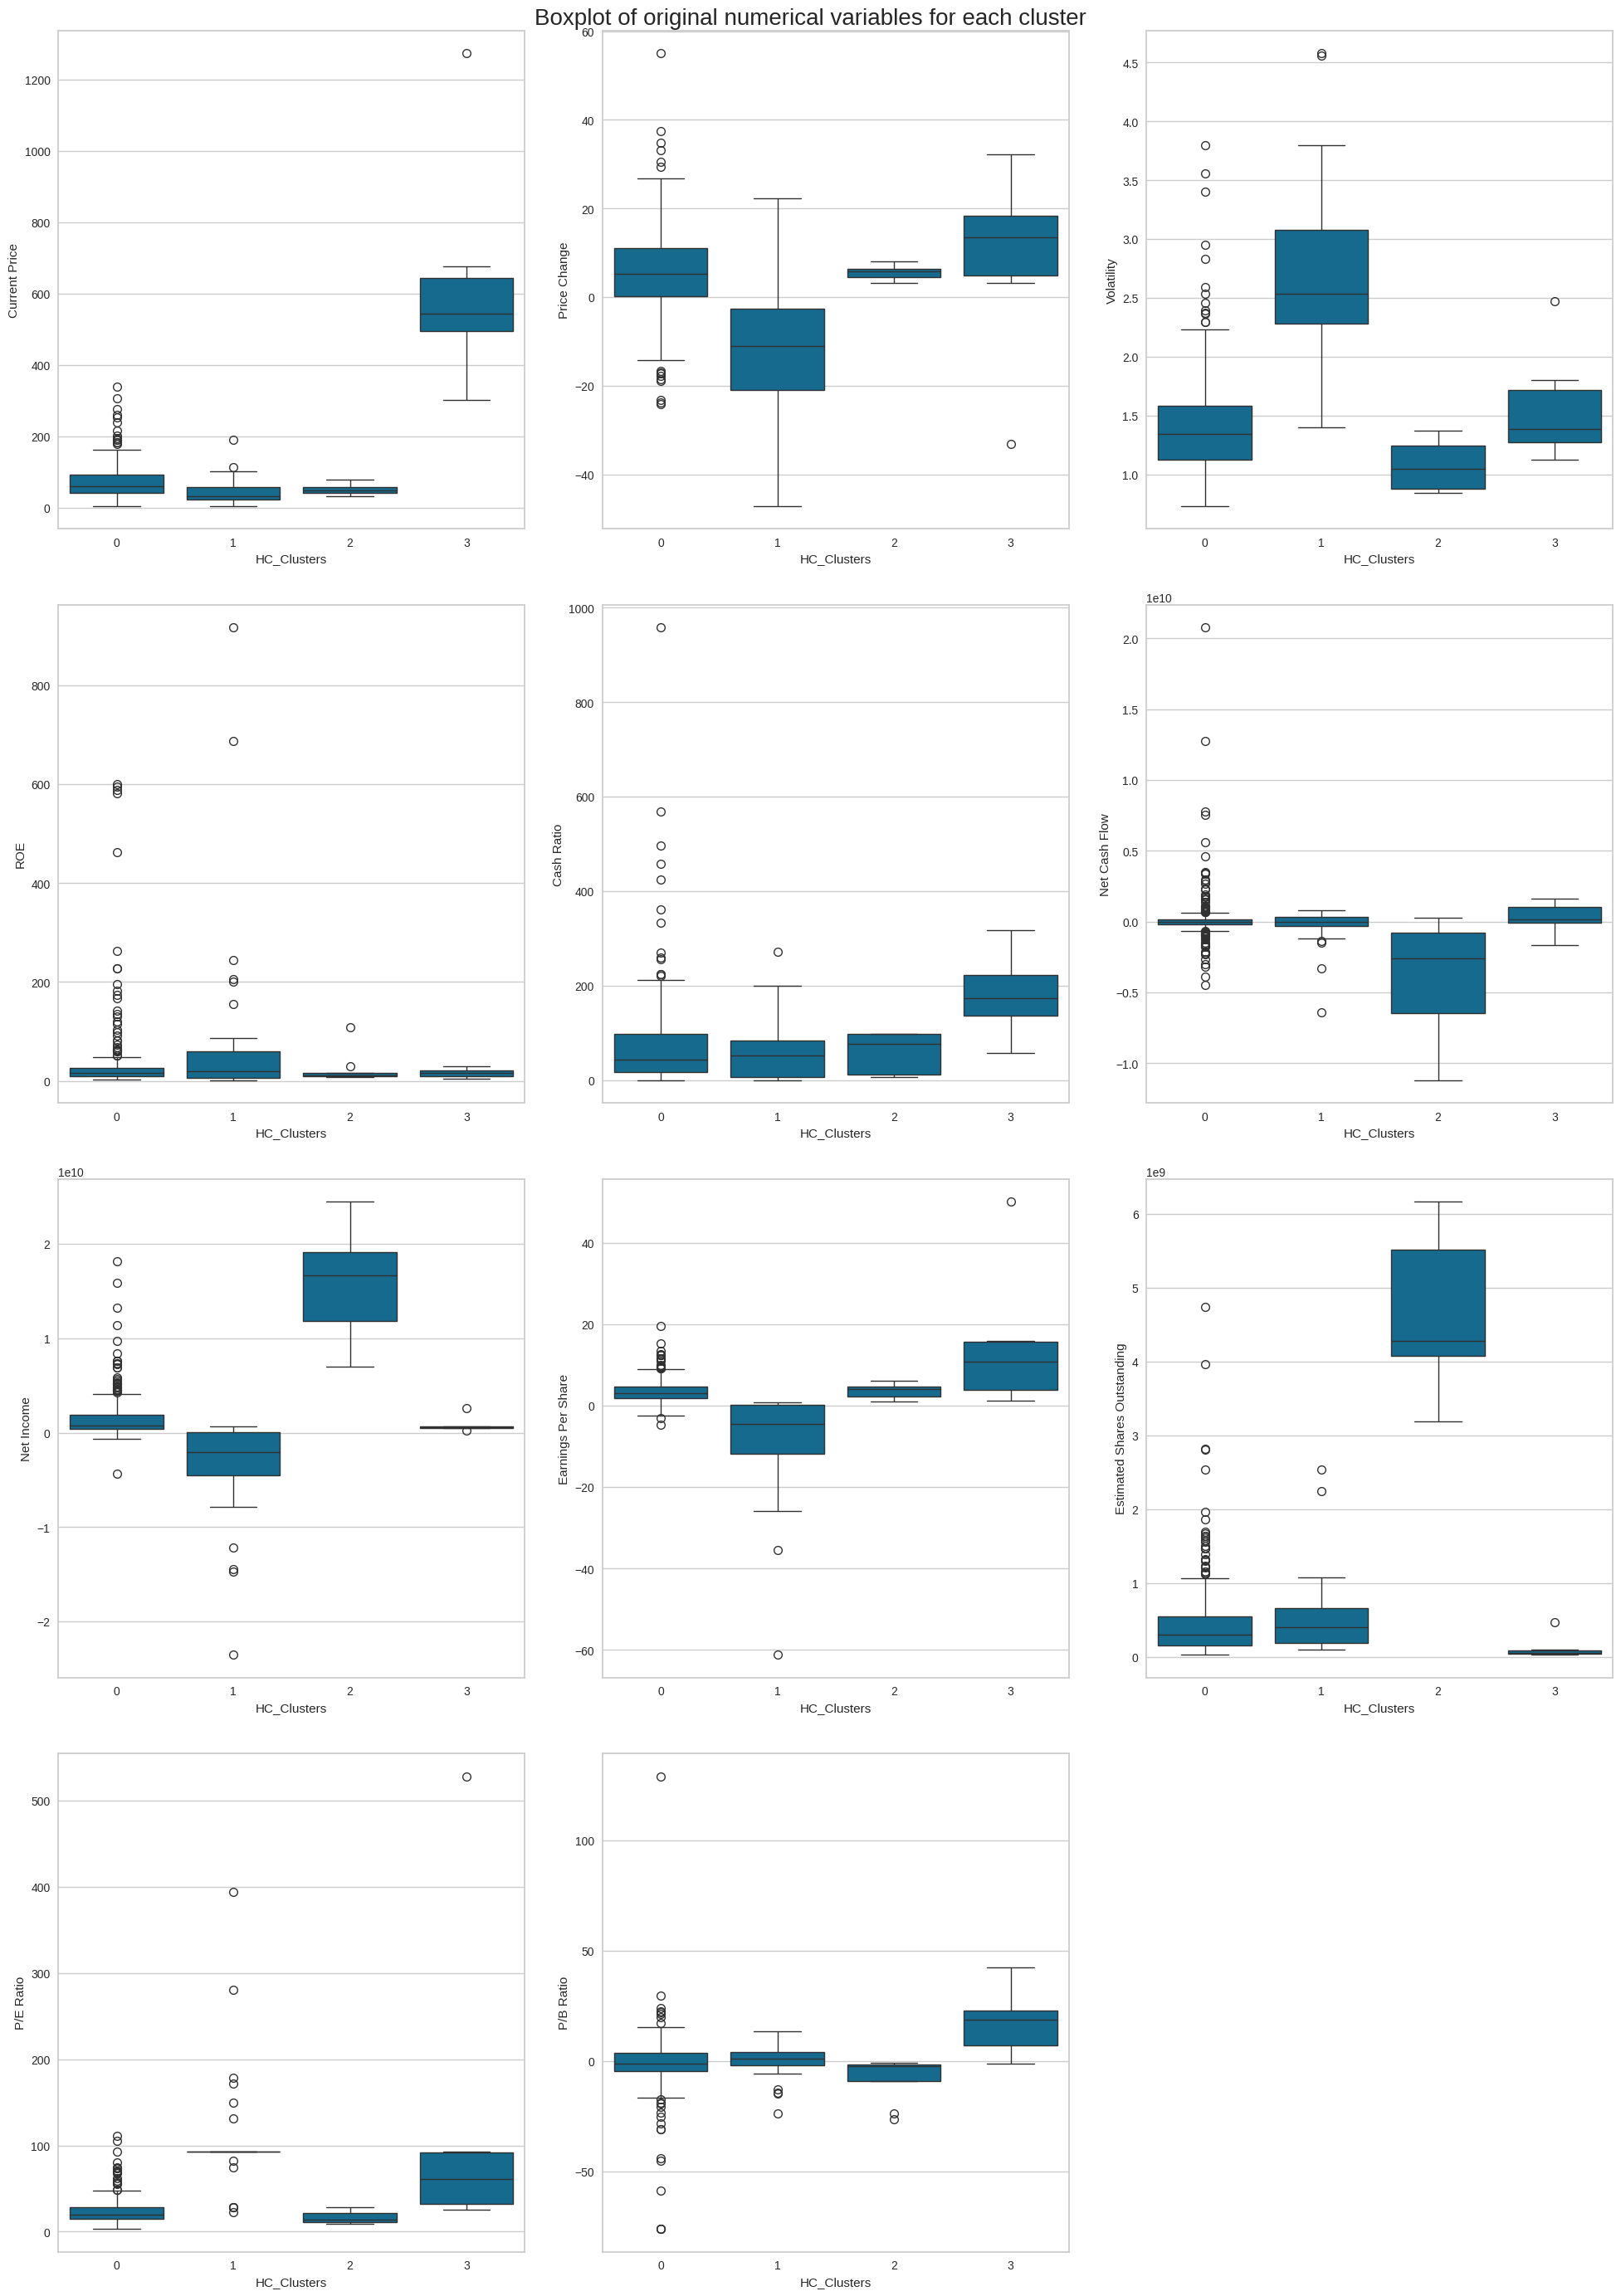

In [212]:
plt.figure(figsize=(20, 35))
plt.suptitle("Boxplot of original numerical variables for each cluster", fontsize=20)

for i, variable in enumerate(numerical_columns):
    plt.subplot(5, 3, i + 1)
    sns.boxplot(data=df2, x="HC_Clusters", y=variable)

plt.tight_layout(pad=2.0)

## Actionable Insights and Recommendations

 - It is interesting to note that both clustering types give us an optimal number of 4 clusters
 - Although this is a subjective approach, I believe that right cut off is around 4 clusters for both methodologies
 - Both clustering methods took a similar amount amount of time to run, but Hierarchical clustering takes less time to run.
 - It is interesting to note that although the average method offered the best cophenetic correlation, it did not offer a clear distinction between clusters.
    - Thus, I decided to go with the second best option, which is using the ward method.
 - When doing so, we get a larger variance between clusters  and notice the following:
    - Cluster 1:
       - lowest price change and largest volatility
       - Less dispersed P/E ratio
    - Cluster 0:
       - highest count of companies at 298
       - Most outliers in its dataset
    - Cluster 2:
       - grouped with the highest income
       - has a significant larger share of shares outstanding
       - only cluster with net cash flow of -1
    - Cluster 3:
       - highest current price
       - highest cash ratio
       - least dispersed net income